## Question 1: Preprocessing (20 points)

In [99]:
import pandas as pd
import numpy as np

### Sklearn

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

In this question, we consider a dataset documenting the Ski Resorts in Europe (**ski_resorts.csv**).
Each row contains some information about the Ski resort.
You can find a short description for each column:

| Column | Description |
| ------ | ----------- |
| Resort | The name of the ski & snowboard resort. |
| Country | The country in which the resort is located. |
| HighestPoint | The highest mountain point at the ski resort.   |
| LowestPoint | The lowest possible point to ski at the ski resort.  |
| DayPassPriceAdult | The price shows what it costs for 1 adult for 1 day in the main season in Euro. |
| BeginnerSlope | The total amount of “beginner” slopes in kilometer at the resort. “Beginner slopes” contains “children”, “blue” and, “green” slopes. |
| IntermediateSlope | The total amount of “intermediate” slopes in kilometer at the resort. “Intermediate slopes” contains “red” slopes. |
| DifficultSlope | The total amount of “difficult” slopes in kilometer at the resort. “Difficult slopes” contains “black”, “advanced”, and ”expert” slopes. |
| TotalSlope | The sum of “beginner slopes” + “intermediate slopes” + “difficult slopes” |
| Snowparks | Does the resort have one or more snowparks, or not? |
| NightSki | Does the resort offer skiing on illuminated slopes? |
| SurfaceLifts | The amount of lifts in this category: T-bar, Sunkidslift, Rope lifts, and people mower. |
| ChairLifts | The total amount of chairlifts. |
| GondolaLifts | The amount of lifts in this category: Gondola, Train lifts, Funicular, Combined gondola and chairlifts, Helicopter lifts, Snowcats, and Aerial tramways. |
| TotalLifts | The sum of “surface lifts etc” + “gondola etc” + “chairlifts etc.” |
| LiftCapacity | How many passengers can the lift system at the ski resort mowe in one hour? |
| SnowCannons  |The total amount of snow cannons at the ski resort.|

### a) Loading the Data and Initial Quality Investigation (2.5pts)

#### **a(i)** 
Load the dataset into a dataframe `df`. <font color='red'>Use the first column as index for your dataframe</font>. Ensure that the index is valid, that is, it should not contain any duplicate entries. 



**In the subsequent questions, only modify the dataframe `df` if explicitly requested. However, you can always create working copies.**

In [100]:
df = pd.read_csv("datasets/ski_resorts.csv", index_col=0)
df_first_column = pd.read_csv("datasets/ski_resorts.csv", usecols=[0])
assert df_first_column[df_first_column.columns[0]].is_unique == True

#### **a(ii)** 
Show the data types of the dataframe columns as well as the first 5 rows. On the first sight, are there any data type problems (e.g., numerical columns having a non-numerical data type)?



In [101]:
print(df.dtypes)
df.head()

Resort                object
Country               object
HighestPoint         float64
LowestPoint          float64
DayPassPriceAdult    float64
BeginnerSlope        float64
IntermediateSlope      int64
DifficultSlope       float64
TotalSlope             int64
Snowparks             object
NightSki              object
SurfaceLifts         float64
ChairLifts             int64
GondolaLifts         float64
TotalLifts             int64
LiftCapacity         float64
SnowCannons          float64
dtype: object


Resort          Country  \
1                              Alpendorf (Ski amedé)          Austria   
2  Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...          Andorra   
3                              Oberau (Wildschönau)          Austria   
4                                     Dachstein West          Austria   
5                                        Rosa Khutor  Southern Russia   

   HighestPoint  LowestPoint  DayPassPriceAdult  BeginnerSlope  \
1        1980.0        740.0               52.0           30.0   
2        2640.0       1710.0               47.0          100.0   
3        1130.0        900.0               30.0            1.0   
4        1620.0        780.0               42.0           15.0   
5        2320.0        940.0               22.0           30.0   

   IntermediateSlope  DifficultSlope  TotalSlope Snowparks NightSki  \
1                 81             4.0         115       Yes       No   
2                 77            33.0         210       Yes      Yes   
3                  0             1.0           2        No       No   
4                 33             3.0          51       Yes      Yes   
5                 26            21.0          77       Yes       No   

   SurfaceLifts  ChairLifts  GondolaLifts  TotalLifts  LiftCapacity  \
1          22.0          16          11.0          49       75398.0   
2          37.0          28           7.0          72       99017.0   
3           2.0           0           0.0           2        1932.0   
4          25.0           8           3.0          36       32938.0   
5           6.0          11          10.0          27       49228.0   

   SnowCannons  
1        600.0  
2       1032.0  
3          0.0  
4        163.0  
5        450.0

**Your Answer:**

The columns `Resort` and `Country` are categorical but instead have the `object` datatype.

The columns `Snowparks` and `NightSki` are holding boolean values (`Yes`/`No`)/ are categorical but do not have the appropriate datatype.

The columns `SurfaceLifts`,`ChairLifts`, `GondaLifts`, `SnowCannons`, `LiftCapacity` and all `*-Slope` columns are float64-columns but are meant to only hold integer values.

#### **a(iii)** 
To improve performance and memory usage (in particular for large datasets) it is important to use **categorical** columns whenever suitable.
Are there any categorical column candidates? Explain your answer. \
Afterward, convert the column(s) in `df` into categorical column(s).

In [102]:
df['Resort'] = df["Resort"].astype('category')
df['Country'] = df["Country"].astype('category')

**Your Answer:**

As stated above, `Resort`, `Country`, `Snowparks`, and `NightSki` are categorical features. We only retype `Resort` and `Country` because we convert the other columns to booleans later on.

### b) Handling Missing Values & Encoding (17.5pts)

In the following task, you can assume that every NAN entry in the dataframe is actually a missing value. This can partially be justified by the fact that pandas did not have problems inferring the "proper" datatypes (e.g., a string indicating a missing number in a number column would result in pandas parsing an object column) and your subsequent check of the data types. Therefore, you can use `df.isna()` as a proxy indicator for missing values.

#### **b(i)** 
Simply discarding missing entries is usually not a good idea. Therefore, you should first analyze the number of missing values and check for patterns of missing values. 

To this end, compute the following statistics on missing values:
1. How many entries does the dataframe have? (To relate this to the number of entries missing)
2. How many missing values do we have? What is the ratio i.e., "number of missing values"/"number of entries of df"?
3. How many rows have at least a single missing value?
4. Count the number of missing values per column.
5. Count the number of missing values per row and aggregate them - i.e., show the number of rows that suffer from x missing values.
6. What do you observe? Are there any rows containing missing values for the same set of columns? Can you identify potential patterns?


In [103]:
# 1
q1_num_entries = len(df.columns) * len(df)
print(f"The dataframe has {q1_num_entries} entries.")

The dataframe has 6392 entries.


In [104]:
# 2
q1_num_na_entries = df.isna().sum().sum()
print(f"The dateframe has {q1_num_na_entries} NaN-entries. The ratio to the total number of entries is {q1_num_na_entries / q1_num_entries}")

The dateframe has 87 NaN-entries. The ratio to the total number of entries is 0.013610763454317897


In [105]:
# 3
q1_rows_with_nan = df[df.isna().any(axis=1)]
print(f"There are {len(q1_rows_with_nan)} rows that have at least one NaN value.")

There are 45 rows that have at least one NaN value.


In [106]:
# 4
q1_cols_with_nan = df.isna().any()
print(f"There are {q1_cols_with_nan.sum()} columns that have at least one NaN value.")
df.isna().sum()

There are 9 columns that have at least one NaN value.


Resort                0
Country               0
HighestPoint         13
LowestPoint           3
DayPassPriceAdult    17
BeginnerSlope         8
IntermediateSlope     0
DifficultSlope        8
TotalSlope            0
Snowparks             0
NightSki              0
SurfaceLifts          6
ChairLifts            0
GondolaLifts          7
TotalLifts            0
LiftCapacity         17
SnowCannons           8
dtype: int64

Text(0, 0.5, 'number of rows')

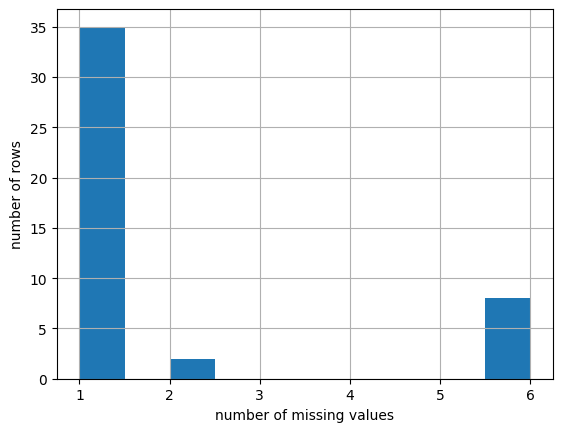

In [107]:
# 5 (1)
ax = q1_rows_with_nan.isna().sum(axis=1).hist()
ax.set_xlabel("number of missing values")
ax.set_ylabel("number of rows")

In [108]:
# 5 (2): 1 missing value
q1_rows_with_nan_count = q1_rows_with_nan.isna().sum(axis=1)

In [11]:
q1_rows_with_nan_count_1 = df.loc[q1_rows_with_nan_count[q1_rows_with_nan_count == 1].index]
print(f"There {len(q1_rows_with_nan_count_1)} rows who are missing exactly one missing value.")
q1_rows_with_nan_count_1_sum = q1_rows_with_nan_count_1.isna().sum()
q1_rows_with_nan_count_1_sum[q1_rows_with_nan_count_1_sum != 0].sort_values(ascending=False)

There 35 rows who are missing exactly one missing value.


DayPassPriceAdult    8
LiftCapacity         8
GondolaLifts         7
HighestPoint         5
SurfaceLifts         4
LowestPoint          3
dtype: int64

In [12]:
q1_rows_with_nan_count_1

Resort        Country  \
10                                        Kobla-Bohinj       Slovenia   
19   Le Grand Massif-Flaine-​Les Carroz-​Morillon-​...         France   
23                                       Kicking Horse         France   
50                           Valberg-​Beuil les Launes         France   
76                                         Flumserberg    Switzerland   
79                                            La Norma         France   
92                                        Les Karellis         France   
105                           Lauchernalp-Lötschental    Switzerland   
117                                               Pila          Italy   
122       Grosseck-​Speiereck-Mauterndorf-​St. Michael        Austria   
123   Hirmentaz-​Les Habères-Bellevaux-​Habère-Poche         France   
126                                       Mythenregion    Switzerland   
151                                          Pamporovo       Bulgaria   
172               Mount Parnassos-Fterolakka-​Kellaria         Greece   
187                                             Malbun  Liechtenstein   
189                         Riesneralm-Donnersbachwald        Austria   
201                              Geißkopf-Bischofsmais        Germany   
208                               Nebelhorn-Oberstdorf        Germany   
229                                  Kellerjoch-Schwaz        Austria   
238                              Grasgehren-Bolgengrat        Germany   
242                            Jochgrimm-Passo Oclini-          Italy   
243                       Alpe Lusia-Moena-​Bellamonte          Italy   
247                                             Gålå         Norway   
250                                 Tatranská Lomnica       Slovakia   
251                           Kanin-Sella Nevea-​Bovec       Slovenia   
260                      Glacier 3000 / Les Diablerets    Switzerland   
267                     Avoriaz (Les Portes du Soleil)         France   
268                     Châtel (Les Portes du Soleil)         France   
275                  Ski Juwel Alpbachtal Wildschönau        Austria   
293  Madonna di Campiglio-​Pinzolo-​Folgàrida-​Mar...          Italy   
298            Balme-​Les Autannes-Vallorcine-​Le Tour         France   
307                                      Fonna Glacier         Norway   
335                Courmayeur / Chécrouit -​ Val Veny          Italy   
343  Saalbach Hinterglemm Leogang Fieberbrunn (Skic...        Austria   
372                          Montgenèvre (Via Lattea)         France   

     HighestPoint  LowestPoint  DayPassPriceAdult  BeginnerSlope  \
10         1480.0        540.0                NaN           12.0   
19            NaN        694.0               47.0          135.0   
23         1608.0       1500.0               39.0           56.0   
50         2020.0       1412.0               32.0           45.0   
76          665.0        425.0               51.0           10.0   
79         2750.0       1350.0               29.0           17.0   
92         2520.0       1600.0                NaN           26.0   
105        3111.0       1419.0               48.0           20.0   
117        1540.0        570.0                NaN            8.0   
122           NaN       1095.0               41.0           26.0   
123        1610.0        923.0               24.0           30.0   
126        1070.0        573.0               39.0           18.0   
151           NaN       1620.0               28.0           17.0   
172        2300.0       1600.0                NaN           18.0   
187        2000.0       1600.0                NaN           11.0   
189        1820.0        950.0               40.0           15.0   
201        1116.0        835.0               24.0            1.0   
208        2224.0        828.0               44.0            2.0   
229         857.0        545.0               29.0            5.0   
238           NaN       1400.0               25.0          

In [13]:
# 5 (1): == 2 missing values
q1_rows_with_nan_count_2 = df.loc[q1_rows_with_nan_count[q1_rows_with_nan_count == 2].index]

print(f"There {len(q1_rows_with_nan_count_2)} rows who are missing exactly two missing values.")
q1_rows_with_nan_count_2_sum = q1_rows_with_nan_count_2.isna().sum()
q1_rows_with_nan_count_2_sum[q1_rows_with_nan_count_2_sum != 0].sort_values(ascending=False)

There 2 rows who are missing exactly two missing values.


SurfaceLifts         2
DayPassPriceAdult    1
LiftCapacity         1
dtype: int64

In [14]:
q1_rows_with_nan_count_2

Resort  Country  HighestPoint  LowestPoint  \
119                  Aprica    Italy        2270.0       1162.0   
204  Sudelfeld-Bayrischzell  Germany        1563.0        850.0   

     DayPassPriceAdult  BeginnerSlope  IntermediateSlope  DifficultSlope  \
119               38.0           28.0                 14             7.0   
204                NaN            5.0                 24             3.0   

     TotalSlope Snowparks NightSki  SurfaceLifts  ChairLifts  GondolaLifts  \
119          50       Yes       No           NaN           4           2.0   
204          32       Yes       No           NaN           5           0.0   

     TotalLifts  LiftCapacity  SnowCannons  
119          16           NaN          0.0  
204          15       17477.0        100.0

In [15]:
# 5 (33): > 2 missing values = 6 missing values
q1_rows_with_nan_count_6 = df.loc[q1_rows_with_nan_count[q1_rows_with_nan_count == 6].index]

# Check that the rest of the rows have each exactly 6 missing values
assert df.loc[q1_rows_with_nan_count[q1_rows_with_nan_count > 2].index].equals(q1_rows_with_nan_count_6)

print(f"There {len(q1_rows_with_nan_count_6)} rows who are missing exactly six values.")
q1_rows_with_nan_count_6_sum = q1_rows_with_nan_count_6.isna().sum()
q1_rows_with_nan_count_6_sum[q1_rows_with_nan_count_6_sum != 0].sort_values(ascending=False)

There 8 rows who are missing exactly six values.


HighestPoint         8
DayPassPriceAdult    8
BeginnerSlope        8
DifficultSlope       8
LiftCapacity         8
SnowCannons          8
dtype: int64

In [16]:
q1_rows_with_nan_count_6

Resort  Country  HighestPoint  \
217             Dry slopes Dayz Søhøjlandets Skicenter  Denmark           NaN   
218  Indoor ski area Skidome Denmark – Randers (pla...  Denmark           NaN   
219                     Dry slopes Indoorski – Rødovre  Denmark           NaN   
220                      Dry slopes Ski Arena – Aarhus  Denmark           NaN   
221                               Copenhagen (planned)  Denmark           NaN   
222                               Østerlars (Bornholm)  Denmark           NaN   
223                            Hoch Hylkedal – Kolding  Denmark           NaN   
342                                Hedelands Skicenter  Denmark           NaN   

     LowestPoint  DayPassPriceAdult  BeginnerSlope  IntermediateSlope  \
217         80.0                NaN            NaN                  0   
218         10.0                NaN            NaN                  1   
219         50.0                NaN            NaN                  0   
220         20.0                NaN            NaN                  0   
221          0.0                NaN            NaN                  0   
222         72.0                NaN            NaN                  0   
223         20.0                NaN            NaN                  0   
342         33.0                NaN            NaN                  0   

     DifficultSlope  TotalSlope Snowparks NightSki  SurfaceLifts  ChairLifts  \
217             NaN           0        No       No           0.0           0   
218             NaN           3        No       No           0.0           0   
219             NaN           0        No       No           0.0           0   
220             NaN           0        No       No           0.0           0   
221             NaN           0        No       No           0.0           0   
222             NaN           0        No       No           0.0           0   
223             NaN           0        No       No           0.0           0   
342             NaN           0        No       No           0.0           0   

     GondolaLifts  TotalLifts  LiftCapacity  SnowCannons  
217           0.0           0           NaN          NaN  
218           0.0           0           NaN          NaN  
219           0.0           0           NaN          NaN  
220           0.0           0           NaN          NaN  
221           0.0           0           NaN          NaN  
222           0.0           0           NaN          NaN  
223           0.0           0           NaN          NaN  
342           0.0           0           NaN          NaN

**Your answer:** *(for 6. What do you observe? Are there any rows containing missing values for the same set of columns?)*

There are three types of rows: those which are missing exactly one value, those which are missing exactly two values, and those who are missing six values.

Rows which are missing exactly one value (n=35) are primarily missing values in `LiftCapacity` (8 of 35), `DayPassPriceAdult` (8 of 35), and `GondolaLifts` (7 of 35).

Rows which are missing exactly two values (n=2) are all missing values in `SurfaceLifts`. Both *have* Snowparks and *don't have* NightSki.

*All* rows who are missing six values (n=8) are missing values in *all* of the following columns: `HighestPoint`, `DayPassPriceAdult`, `BeginnerSlope`, `DifficultSlope`, `LiftCapacity`, `SnowCannons`. All those rows are resorts from Denmark. Those resorts do not have any lifts.

#### **b(ii)**
For the next step:

1. Transform the categorical column(s) you identified in a(iii) into one-hot encoding format. 
2. Transform the columns "Snowparks" and "NightSki" in `df` into boolean data type, where "Yes" should be `True` and "No" should be `False`

In the end, the original categorical column(s) should still be there. Additionally, there should be x number (x is the number of unique values) of one-hot encoding columns for each categorical column. Use the following naming convention for the new columns "{name of the categorical column}_{unique value for that column}" Also, make sure the columns "Snowparks" and "NightSki" are boolean type in the end.
Lastly, print the top five rows of the resulting dataframe.

*Hint: You can use the pd.get_dummies() function from pandas for the first transformation*

In [17]:
df = pd.get_dummies(df, columns=['Resort', 'Country'])

In [18]:
df['Snowparks'] = df["Snowparks"].apply(lambda tf: tf == "Yes")
df['NightSki'] = df["NightSki"].apply(lambda tf: tf == "Yes")

In [19]:
assert df.dtypes["Snowparks"] == np.dtype('bool')
assert df.dtypes["NightSki"] == np.dtype('bool')
df.head(5)

HighestPoint  LowestPoint  DayPassPriceAdult  BeginnerSlope  \
1        1980.0        740.0               52.0           30.0   
2        2640.0       1710.0               47.0          100.0   
3        1130.0        900.0               30.0            1.0   
4        1620.0        780.0               42.0           15.0   
5        2320.0        940.0               22.0           30.0   

   IntermediateSlope  DifficultSlope  TotalSlope  Snowparks  NightSki  \
1                 81             4.0         115       True     False   
2                 77            33.0         210       True      True   
3                  0             1.0           2      False     False   
4                 33             3.0          51       True      True   
5                 26            21.0          77       True     False   

   SurfaceLifts  ...  Country_Serbia  Country_Siberia  Country_Slovakia  \
1          22.0  ...               0                0                 0   
2          37.0  ...               0                0                 0   
3           2.0  ...               0                0                 0   
4          25.0  ...               0                0                 0   
5           6.0  ...               0                0                 0   

   Country_Slovenia  Country_Southern Russia  Country_Spain  Country_Sweden  \
1                 0                        0              0               0   
2                 0                        0              0               0   
3                 0                        0              0               0   
4                 0                        0              0               0   
5                 0                        1              0               0   

   Country_Switzerland  Country_Ukraine  Country_United Kingdom  
1                    0                0                       0  
2                    0                0                       0  
3                    0                0                       0  
4                    0                0                       0  
5                    0                0                       0  

[5 rows x 418 columns]

#### **b(iii)** 
The previous analysis in b(i) showed that there are missing values in the 'SurfaceLifts' and 'GondolaLifts' columns.\
How would you impute these values? \
Motivate your approach and apply it to `df`.

*Hint: Remember the semantics of the columns. Also, carefully assert your assumptions.*


**Your Answer:**

First, we set all `*-Lifts` fields to zero when `TotalLifts` is zero.

Then, we try to impute `SurfaceLifts` with the relation `SurfaceLifts` = `TotalLifts` - `GondolaLifts` - `ChairLifts`.

Lastly, we try to impute `GondolaLifts` with the relation `SurfaceLifts` = `TotalLifts` - `SurfaceLifts` - `ChairLifts`.

In [20]:
import math

def impute_zero_lifts(row):
    if row['TotalLifts'] == 0:
        row['SurfaceLifts'] = 0.0
        row['ChairLifts'] = 0.0
        row['GondolaLifts'] = 0.0
    return row

def impute_missing_surface_Lifts(row):
    if math.isnan(row['SurfaceLifts']):
        row['SurfaceLifts'] = row['TotalLifts'] - row['GondolaLifts'] - row['ChairLifts']

    return row

def impute_missing_gondola_Lifts(row):
    if math.isnan(row['GondolaLifts']):
        row['GondolaLifts'] = row['TotalLifts'] - row['SurfaceLifts'] - row['ChairLifts']

    return row

df = df.apply(impute_zero_lifts, axis=1)
df = df.apply(impute_missing_surface_Lifts, axis=1)
df = df.apply(impute_missing_gondola_Lifts, axis=1)

assert df.isna().any()["SurfaceLifts"] == False
assert df.isna().any()["GondolaLifts"] == False

#### **b(iv)**
Impute the rest of the missing values using the knn-imputation method. To this end, apply the following steps:
1. Create a working copy `df_tmp` of your updated `df`.
2. For simplicity, drop the non-numerical columns (i.e., not of types integer or floats), which also inlcude the one-hot encoded and the boolean columns* you created earlier.
3. Normalize the data in `df_tmp` (e.g., Standard score normalization). If the features have very different scales, knn can become very biased.
4. Impute the missing values considering six neig'hbors.
5. Invert the transformation applied upfront to enable more meaningful and intuitive visualizations.
6. Append the columns you dropped in step 2.
 
In the end, `df` should not contain missing values and have all the columns.

\*Note that by dropping the columns we lose the information of countries and the two boolean attributes ("Snowparks" and "NightSki") when imputing the missing values, which might be crucial for inferencing values such as the price for a ski pass. In practice, one should try to find if there are correlations before deciding whether to drop the columns or not.
We drop the columns here to make the following steps easier because we only have to deal with numerical columns.

*Hint: Be careful with the indices of your dataframes.*


In [21]:
def to_dataframe(values, df):
    return pd.DataFrame(
        values,
        index=df.index,
        columns=df.columns
    )

df_tmp = df.copy()
df_tmp = df_tmp.select_dtypes(['number'])
df_tmp = df_tmp.set_index(df.index)

In [22]:
from sklearn import preprocessing

standard_scaler = preprocessing.StandardScaler()
standard_scaler.fit(df_tmp.values)

df_tmp = to_dataframe(
    standard_scaler.transform(df_tmp.values),
    df_tmp
)

In [23]:
imputer = KNNImputer(n_neighbors=6)

df_tmp = to_dataframe(
    imputer.fit_transform(df_tmp),
    df_tmp
)

In [24]:
df_tmp = to_dataframe(standard_scaler.inverse_transform(df_tmp), df_tmp)

In [25]:
df.update(df_tmp)

In [26]:
assert df.isna().sum().sum() == 0

In [27]:
df.head()

HighestPoint  LowestPoint  DayPassPriceAdult  BeginnerSlope  \
1        1980.0        740.0               52.0           30.0   
2        2640.0       1710.0               47.0          100.0   
3        1130.0        900.0               30.0            1.0   
4        1620.0        780.0               42.0           15.0   
5        2320.0        940.0               22.0           30.0   

   IntermediateSlope  DifficultSlope  TotalSlope  Snowparks  NightSki  \
1               81.0             4.0       115.0       True     False   
2               77.0            33.0       210.0       True      True   
3                0.0             1.0         2.0      False     False   
4               33.0             3.0        51.0       True      True   
5               26.0            21.0        77.0       True     False   

   SurfaceLifts  ...  Country_Serbia  Country_Siberia  Country_Slovakia  \
1          22.0  ...             0.0              0.0               0.0   
2          37.0  ...             0.0              0.0               0.0   
3           2.0  ...             0.0              0.0               0.0   
4          25.0  ...             0.0              0.0               0.0   
5           6.0  ...             0.0              0.0               0.0   

   Country_Slovenia  Country_Southern Russia  Country_Spain  Country_Sweden  \
1               0.0                      0.0            0.0             0.0   
2               0.0                      0.0            0.0             0.0   
3               0.0                      0.0            0.0             0.0   
4               0.0                      0.0            0.0             0.0   
5               0.0                      1.0            0.0             0.0   

   Country_Switzerland  Country_Ukraine  Country_United Kingdom  
1                  0.0              0.0                     0.0  
2                  0.0              0.0                     0.0  
3                  0.0              0.0                     0.0  
4                  0.0              0.0                     0.0  
5                  0.0              0.0                     0.0  

[5 rows x 418 columns]

## Question 2: Visualization (13 points)

In this task, you will analyze the data using different means of visualization.

Start with the following preprocessed and integrated dataframe `df_v`. \
Note that it has a similar structure to the dataframe that you should obtain from the previous task, however, the values have been modified.

In [28]:
import pandas as pd
import plotly.express as px
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df_v = pd.read_csv("./datasets/ski_resorts_visual.csv", index_col=0)
df_v.head()

Resort          Country  \
1                              Alpendorf (Ski amedé)          Austria   
2  Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...          Andorra   
3                              Oberau (Wildschönau)          Austria   
4                                     Dachstein West          Austria   
5                                        Rosa Khutor  Southern Russia   

   HighestPoint  LowestPoint  DayPassPriceAdult  BeginnerSlope  \
1          1980          740                 52             30   
2          2640         1710                 47            100   
3          1130          900                 30              1   
4          1620          780                 42             15   
5          2320          940                 22             30   

   IntermediateSlope  DifficultSlope  TotalSlope Snowparks NightSki  \
1                 81               4         115       Yes       No   
2                 77              33         210       Yes      Yes   
3                  0               1           2        No       No   
4                 33               3          51       Yes      Yes   
5                 26              21          77       Yes       No   

   SurfaceLifts  ChairLifts  GondolaLifts  TotalLifts  LiftCapacity  \
1            22          16            11          49         75398   
2            37          28             7          72         99017   
3             2           0             0           2          1932   
4            25           8             3          36         32938   
5             6          11            10          27         49228   

   SnowCannons  
1          600  
2         1032  
3            0  
4          163  
5          450

### **a) (3pts)** 
To start the visual analysis, make a Scatter plot matrix to visually check if there are any correlations between the numerical attributes.

*Hint: You can use the scatter_matrix from pandas.plotting or pairplot from seaborn to make the plot.*


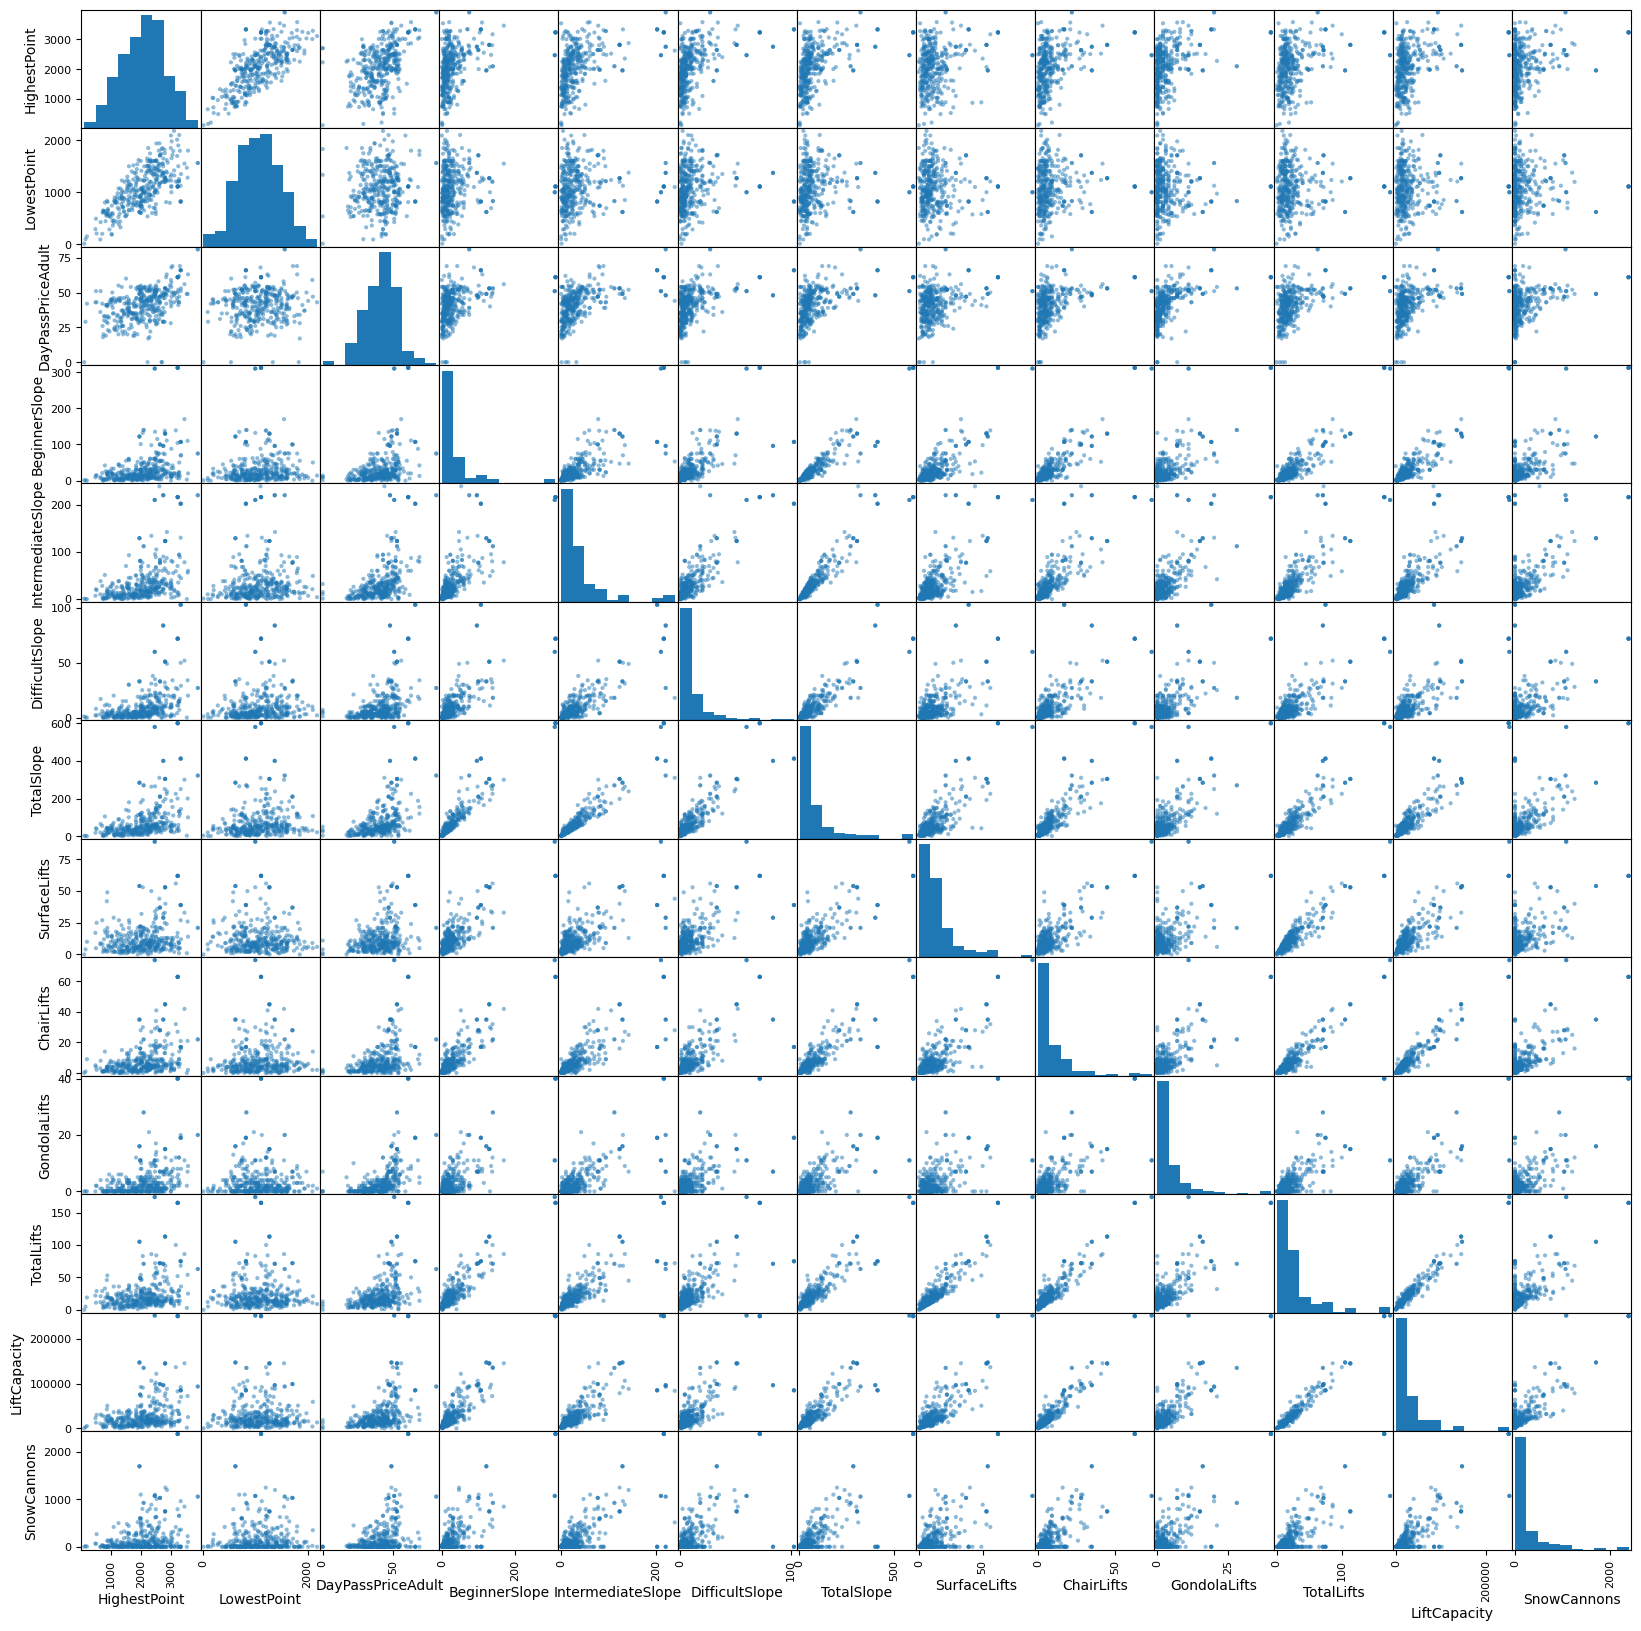

In [30]:
scatter_matrix(df_v, figsize=(20, 20));

### **b) (3pts)**
Another way to detect correlation is to calculate the Pearson correlation coefficient. Calculate the correlation matrix for the numerical data and visualize the matrix using a heatmap. 
Briefly discuss your findings from the heatmap and the scatter plot you created in 2(a).

Make sure to annotate the heatmap with the values of the correlation.

*Hint: You can use the heatmap function from seaborn to make the plot.*

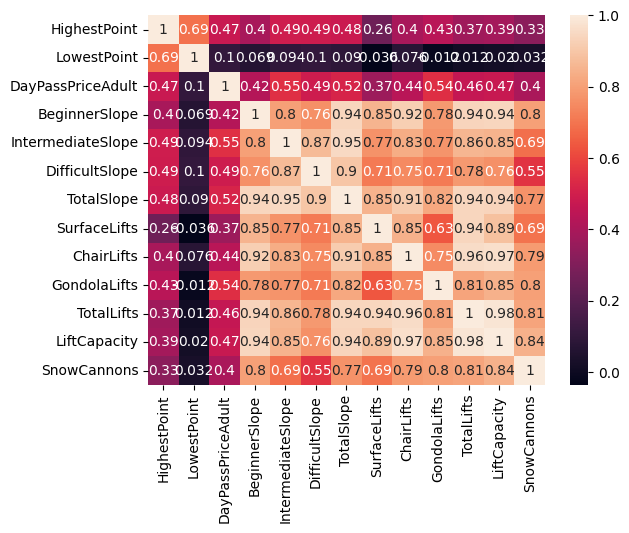

In [31]:
q2_df_v_numeric = df_v.select_dtypes(['number'])
sns.heatmap(q2_df_v_numeric.corr(), annot=True);

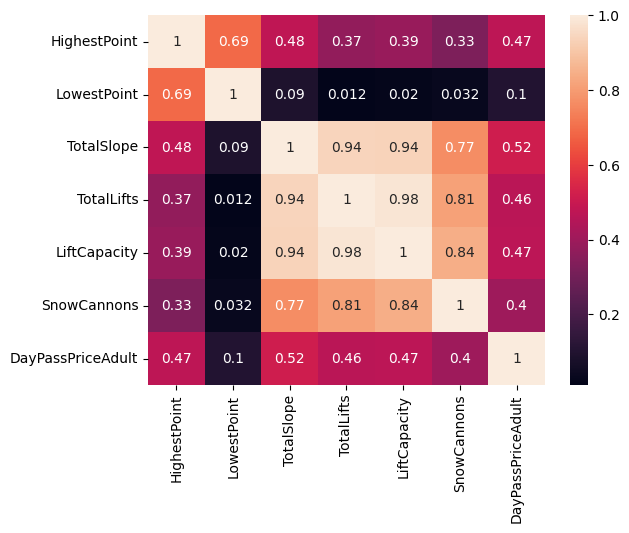

In [32]:
q2_df_v_numeric_filtered = q2_df_v_numeric.filter(["HighestPoint", "LowestPoint", "TotalSlope", "TotalLifts", "LiftCapacity", "SnowCannons", "DayPassPriceAdult"])
sns.heatmap(q2_df_v_numeric_filtered.corr(), annot=True); 

##### Answer: correlation between the features

Ignored (because of obvious correlations):
`Lowest Point` with `Highest Point`,
`TotalLift` with `*-Lift`,
`*-Lift` with `*-Lift`,
`TotalSlope` with `*-Slope`,
`*-Slope` with `*-Slope`

Findings:

LiftCapacity, TotalLifts, and TotalSlope are pairwise highly positively correlated.
SnowCannons is positively correlated with TotalSlope, TotalLifts, and LiftCapacity.
Price and Slope is moderately correlated.

### **c) (4pts)** 
We now want to have an overview of the attribute "TotalSlope" aggregated by different levels of hierarchy (Europe -> Country -> Resort). It seems that a tree map is suitable for this purpose.

Make a tree map where
- the root node represents Europe.
- the child nodes of Europe are countries.
- the child nodes of each country are the ski resorts.
- the size of the rectangles is determined by the attribute "TotalSlope".

Also, use the tree map to find out
1. The sum of TotalSlopes of a country, list the top five countries and the corresponding values.
2. The max value of TotalSlope of the five countries you identified in 1.

*Hint: You can use the treemap function from plotly.express.*

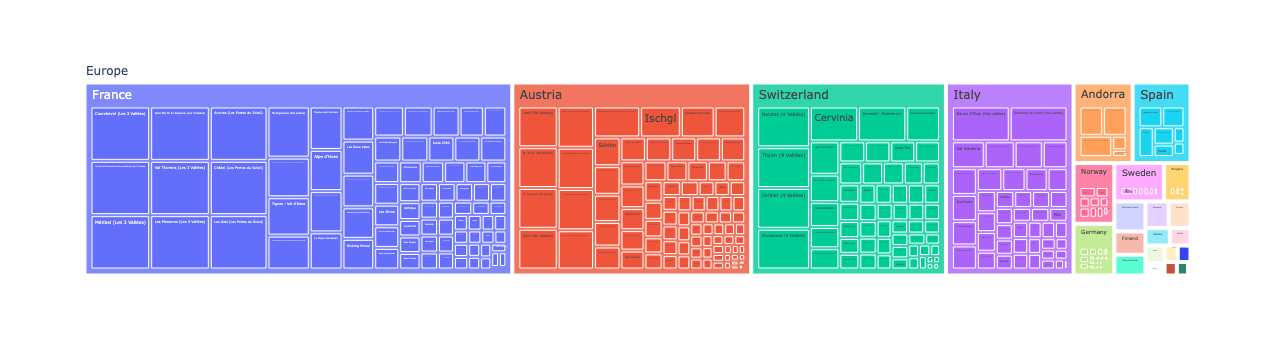

In [33]:
px.treemap(df_v, path=[px.Constant("Europe"), 'Country', 'Resort'], values='TotalSlope')

#### 1. The sum of TotalSlopes of a country. List the top five countries and the corresponding values:

- France: 12.546
- Austria: 7.005
- Switzerland: 5.710
- Italy: 3.742
- Andorra: 723

#### 2. The max value of TotalSlope of the five countries you identified in 1:

- France: _600_
- Austria: 304
- ...

### **d) (3pts)** 

An alternative to a tree map is a sunburst plot, the principle is similar to a tree map. 

Recall from the lecture that:
- Each ring is a different level of the hierarchy
- Each segment of a ring belongs to one categorical value
- The size of a segment is either divided proportionally to a value

Now, we would like to have an overview of the attribute "TotalLifts" aggregated by different level of hierarchy.

Make a sunburst plot where
- the first hierarchy(ring) is "Country"
- the second hierarchy(ring) is "Snowparks" (whether the resort has snowparks)
- the third hierarchy(ring) is "Resort"
- the size of the segments is determined by the attribute "TotalLifts".

Then, briefly discuss your findings from the plot.

*Hint: You can use the sunburst function from plotly.express.*

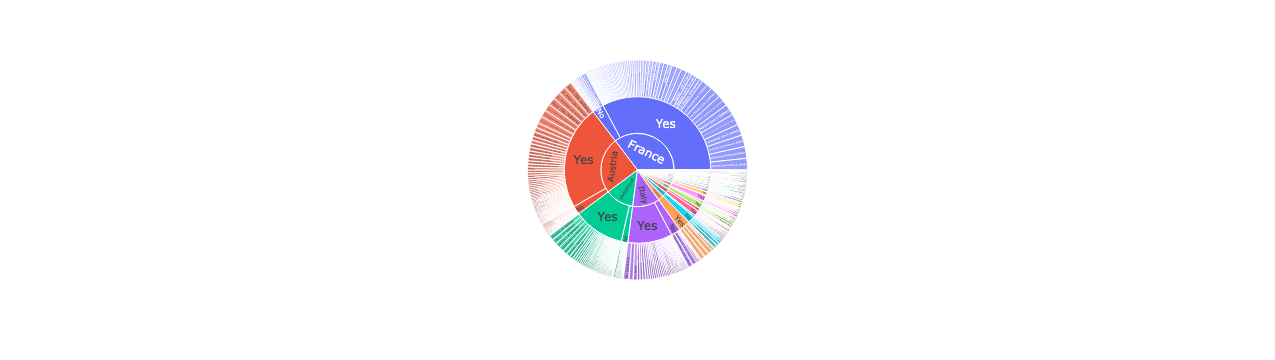

In [34]:
px.sunburst(df_v, path=['Country', 'Snowparks', 'Resort'], values='TotalLifts')

**Your answer:**

Number of lifts that are in resorts that are snowparks: 8.964

Distribution of lifts that are in snowparks (top 3 countries):

- France: 3578
- Austria: 2531
- Switzerland: 1284

Most resorts have snowparks and their lifts are mostly in France (around 40%), Austria (around 28%), and Switzerland (around 14 %).

## Question 3 - Frequent Item Sets and Association Rules (15 points)

In [35]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules as arule

### A real online retail transaction data set of two years.

Data Set Information:
This Retail dataset contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift ware. Many customers of the company are wholesalers.

Attribute Information:
- Invoice: Invoice number. Nominal. A 6-digit integral number is uniquely assigned to each transaction. If the number starts with 'C' it refers to a canceled transaction.
- StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invoice date and time. Numeric. The day and time when a transaction was generated.
- Price: Unit price. Numeric. Product price per unit in sterling (£).
- CustomerID: Customer number. Nominal. A 5-digit integral number is uniquely assigned to each customer. This number has postfix 'n'.
- Country: Country name. Nominal. The name of the country where a customer resides.

### a) Loading, exploring and preprocessing the dataset (4 pts)

#### **a(i)** 
Load the data from `retail.csv` and save it under the variable `retail_df`. Display the first few lines of the dataframe.

In [36]:
retail_df = pd.read_csv("datasets/retail.csv")
retail_df.head()

Invoice StockCode                          Description  Quantity  \
0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1  536365     71053                  WHITE METAL LANTERN         6   
2  536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3  536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4  536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  Price  CustomerID         Country  
0  01/12/2010 08:26   2.55      178500  United Kingdom  
1  01/12/2010 08:26   3.39      178500  United Kingdom  
2  01/12/2010 08:26   2.75      178500  United Kingdom  
3  01/12/2010 08:26   3.39      178500  United Kingdom  
4  01/12/2010 08:26   3.39      178500  United Kingdom

#### **a(ii)** 
To get to know the dataset, do the following:

- Show the number of rows in the dataset.
- Show the number of unique customers.
- Show the number of unique product names.
- Show the number of unique invoices.
- Show the number and the list of all the countries where the customers reside.

In [37]:
q3_num_rows = len(retail_df)
q3_num_customers = len(retail_df["CustomerID"].unique())
q3_num_product_names = len(retail_df["Description"].unique())
q3_num_invoice = len(retail_df["Invoice"].unique())
q3_countries = retail_df["Country"].unique()

print(f"Number of rows: {q3_num_rows}")
print(f"Number of customers: {q3_num_customers}")
print(f"Number of product names: {q3_num_product_names}")
print(f"Number of invoices: {q3_num_invoice}")
print(f"Number of countries: {len(q3_countries)}")
print(f"Unique countries: {q3_countries}")

Number of rows: 406525
Number of customers: 4367
Number of product names: 3896
Number of invoices: 22177
Number of countries: 35
Unique countries: ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Saudi Arabia' 'Czech Republic' 'Canada' 'Brazil'
 'USA' 'Bahrain' 'Malta' 'RSA']


#### **a(iii)** 
You are interested in analyzing itemsets that are frequently purchased together. Before continuing with that task, you have to make sure that the data are fit for such analysis. 1) More precisely, you want to make sure that there are no missing values in the data. 2) Moreover, you want to ensure that each item's name in the "Description" is consistent. E.g., you want "Description" values such as " coffee black", "coffee &nbsp;black", " coffee black &nbsp;", etc. to be mapped to the same value (e.g. "coffee black"). 3) Last but not least, you want to remove transactions that were canceled. Such transactions correspond to rows where the invoice number starts with letter 'C'.

Apply these preprocessing steps to the dataset `retail_df` and apply them on the dataframe itself (e.g. set inplace=True).

In [38]:
retail_df

Invoice StockCode                          Description  Quantity  \
0       536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1       536365     71053                  WHITE METAL LANTERN         6   
2       536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3       536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4       536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...        ...       ...                                  ...       ...   
406520  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
406521  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
406522  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
406523  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
406524  581587      POST                              POSTAGE         1   

             InvoiceDate  Price  CustomerID         Country  
0       01/12/2010 08:26   2.55      178500  United Kingdom  
1       01/12/2010 08:26   3.39      178500  United Kingdom  
2       01/12/2010 08:26   2.75      178500  United Kingdom  
3       01/12/2010 08:26   3.39      178500  United Kingdom  
4       01/12/2010 08:26   3.39      178500  United Kingdom  
...                  ...    ...         ...             ...  
406520  09/12/2011 12:50   2.10      126800          France  
406521  09/12/2011 12:50   4.15      126800          France  
406522  09/12/2011 12:50   4.15      126800          France  
406523  09/12/2011 12:50   4.95      126800          France  
406524  09/12/2011 12:50  18.00      126800          France  

[406525 rows x 8 columns]

In [39]:
# 1.
retail_df = retail_df.dropna()

# 2.
retail_df["Description"] = retail_df["Description"].apply(lambda description: " ".join(description.strip().split()))

# 3.
retail_df = retail_df[~retail_df["Invoice"].str.startswith('C')]

#### **a(iv)** 
After applying the preprocessing steps in **a(iii)** , repeat again the task **a(ii)**, that is:

- Show the number of rows in the dataset.
- Show the number of unique customers.
- Show the number of all unique product names.
- Show the list of all the countries where the customers reside.

Which values changed?

In [40]:
q3_num_rows_2 = len(retail_df)
q3_num_customers_2 = len(retail_df["CustomerID"].unique())
q3_num_product_names_2 = len(retail_df["Description"].unique())
q3_countries_2 = retail_df["Country"].unique()

print(f"Number of rows: {q3_num_rows_2} (diff: {q3_num_rows_2 - q3_num_rows})")
print(f"Number of customers: {q3_num_customers_2} (diff: {q3_num_customers_2 - q3_num_customers})")
print(f"Number of product names: {q3_num_product_names_2} (diff: {q3_num_product_names_2 - q3_num_product_names})")
print(f"Number of countries: {len(q3_countries_2)} (diff: {len(q3_countries_2) - len(q3_countries)})")
print(f"Unique countries: {q3_countries_2}")

Number of rows: 397621 (diff: -8904)
Number of customers: 4334 (diff: -33)
Number of product names: 3858 (diff: -38)
Number of countries: 35 (diff: 0)
Unique countries: ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Finland' 'Austria' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Israel' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Brazil' 'USA' 'Bahrain' 'Malta' 'RSA']


**Your answer:**

The number of rows, the number of customers, and the number of unique product names changed. The number of countries did not change.

### b) Frequent itemsets and Association rules (8 pts)

#### **b(i)** 
Each invoice number in the dataset identifies a unique transaction. There are potentially many rows in the dataframe having the same invoice number. We want to analyze items that are frequently purchased together, that is, items that appear in the same transaction.

Create a new dataframe named `transaction_df` with two columns: "Invoice" and "Description". Here the "Invoice" value is the index of the dataframe (the unique number identifying each row) and "Description" is the column containing all items (without duplicates) purchased within the transaction with that invoice number. Display the first few rows of your dataframe. How many rows does the `transaction_df` have?

In [41]:
transaction_df = retail_df.filter(["Invoice", "Description"]).copy()
transaction_df = transaction_df.groupby('Invoice')['Description'].apply(lambda descriptions: list(set(descriptions)))
transaction_df = transaction_df.to_frame()
assert transaction_df.index.name == "Invoice"
print("The shape of transaction_df is", transaction_df.shape)
transaction_df.head()

The shape of transaction_df is (18524, 1)


Description
Invoice                                                   
536365   [RED WOOLLY HOTTIE WHITE HEART., GLASS STAR FR...
536366   [HAND WARMER UNION JACK, HAND WARMER RED POLKA...
536367   [FELTCRAFT PRINCESS CHARLOTTE DOLL, POPPY'S PL...
536368   [BLUE COAT RACK PARIS FASHION, JAM MAKING SET ...
536369                          [BATH BUILDING BLOCK WORD]

**Your answer:**

`transaction_df` has 18524 rows.

#### **b(ii)** 
Next, we want to compute frequent itemsets and association rules based on the sets of items ordered together. Use the TransactionEncoder to transform `transaction_df` into a matrix such that the value in the i-th row and the j-th column is $True$ if the i-th itemset contains product j, and $False$ otherwise. Save the matrix into a dataframe named `transactions`. Display the shape of the matrix.

*Hint: Note that your dataframe 'transactions' must contain as many rows as there are invoice numbers and as many columns as there are unique products.*

In [42]:
q3_te = TransactionEncoder()
q3_te_mat = q3_te.fit_transform(transaction_df["Description"])
transactions = pd.DataFrame(data=q3_te_mat, columns=q3_te.columns_)
print("The shape of the transactions dateframe is", transactions.shape)

The shape of the transactions dateframe is (18524, 3858)


#### **b(iii)** 
Use the apriori method on `transactions` to obtain all frequent itemsets using min_support=0.01. Display all frequent itemsets that have at least three items. What support count does an itemset have for our case if it satisfies min_support=0.01?

In [43]:
q3_apriori_df = apriori(transactions, low_memory=True, min_support=0.01)

In [44]:
q3_apriori_df['length'] = q3_apriori_df['itemsets'].apply(lambda x: len(x))
q3_apriori_df_at_least_3 = q3_apriori_df[q3_apriori_df['length'] >= 3]
print(len(q3_apriori_df_at_least_3))
q3_apriori_df_at_least_3

59


support                  itemsets  length
923  0.011607           (137, 133, 134)       3
924  0.014414           (136, 137, 133)       3
925  0.014630        (2509, 1493, 2750)       3
926  0.021054        (2509, 1493, 2847)       3
927  0.016843        (1493, 2750, 2847)       3
928  0.012524        (1745, 1747, 1751)       3
929  0.010149        (1745, 1747, 1758)       3
930  0.011876        (1760, 1745, 1747)       3
931  0.010095        (1760, 1747, 1758)       3
932  0.010095        (1928, 1747, 1927)       3
933  0.011013        (1928, 1921, 1922)       3
934  0.010905        (1921, 1922, 1932)       3
935  0.010473        (1928, 1921, 1927)       3
936  0.010581        (1928, 1921, 1931)       3
937  0.011769        (1928, 1921, 1932)       3
938  0.010473        (1928, 1921, 1936)       3
939  0.014036        (1922, 1923, 1927)       3
940  0.014144        (1928, 1922, 1923)       3
941  0.012038        (1922, 1923, 1931)       3
942  0.013604        (1922, 1923, 1932)       3
943  0.010581        (1936, 1922, 1923)       3
944  0.016627        (1928, 1922, 1927)       3
945  0.012146        (1922, 1931, 1927)       3
946  0.013118        (1922, 1932, 1927)       3
947  0.010689        (1936, 1922, 1927)       3
948  0.013874        (1928, 1922, 1931)       3
949  0.015116        (1928, 1922, 1932)       3
950  0.012416        (1928, 1922, 1936)       3
951  0.013604        (1922, 1931, 1932)       3
952  0.011337        (1936, 1922, 1931)       3
953  0.011283        (1936, 1922, 1932)       3
954  0.015062        (1928, 1923, 1927)       3
955  0.011984        (1923, 1931, 1927)       3
956  0.012524        (1923, 1932, 1927)       3
957  0.010581        (1936, 1923, 1927)       3
958  0.012686        (1928, 1923, 1931)       3
959  0.014846        (1928, 1923, 1932)       3
960  0.012416        (1928, 1923, 1936)       3
961  0.012902        (1932, 1923, 1931)       3
962  0.011391        (1936, 1923, 1931)       3
963  0.011445        (1936, 1923, 1932)       3
964  0.011553        (1928, 1931, 1925)       3
965  0.010959        (1928, 1932, 1925)       3
966  0.011067        (1931, 1932, 1925)       3
967  0.010095        (1936, 1931, 1925)       3
968  0.013550        (1928, 1931, 1927)       3
969  0.015116        (1928, 1932, 1927)       3
970  0.012794        (1928, 1936, 1927)       3
971  0.010689        (1931, 1932, 1927)       3
972  0.010797        (1936, 1931, 1927)       3
973  0.010581        (1936, 1932, 1927)       3
974  0.014630        (1928, 1931, 1932)       3
975  0.013928        (1928, 1931, 1936)       3
976  0.013766        (1928, 1932, 1936)       3
977  0.011769        (1936, 1931, 1932)       3
978  0.014306        (2509, 2750, 2847)       3
979  0.010041        (2585, 2586, 2587)       3
980  0.012902  (2509, 1493, 2750, 2847)       4
981  0.010419  (1928, 1922, 1923, 1927)       4

In [45]:
print(f"Given an itemset with a support of 0.01 we obtain a support count of {int(np.ceil(0.01 * len(q3_apriori_df)))}.")

Given an itemset with a support of 0.01 we obtain a support count of 10.


**Your answer:**

Given an itemset with a support of 0.01 we obtain a support count of 10.


#### **b(iv)**
Now we will discover association rules from the frequent itemsets. Using only the frequent itemsets with min_support=0.01 (the ones obtained in **b(iii)**), generate different association rules using min_conf=0.6 and min_conf=0.9 as thresholds. Show the association rules for each of the thresholds. What do you notice w.r.t. the number of association rules produced for the different thresholds?

In [46]:
arules_0_6 = arule(q3_apriori_df, min_threshold=0.6)
arules_0_9 = arule(q3_apriori_df, min_threshold=0.9)

In [47]:
display(arules_0_6)
print('Len of arules_0_6: ', len(arules_0_6))

antecedents   consequents  antecedent support  consequent support  \
0                 (132)         (133)            0.017383            0.042593   
1                 (132)         (137)            0.017383            0.047290   
2                 (135)         (133)            0.019380            0.042593   
3                 (137)         (133)            0.047290            0.042593   
4                 (133)         (137)            0.042593            0.047290   
..                  ...           ...                 ...                 ...   
145        (1493, 2750)  (2509, 2847)            0.020190            0.023537   
146  (1928, 1922, 1923)        (1927)            0.014144            0.050259   
147  (1928, 1922, 1927)        (1923)            0.016627            0.052149   
148  (1928, 1923, 1927)        (1922)            0.015062            0.056791   
149  (1922, 1923, 1927)        (1928)            0.014036            0.069531   

      support  confidence       lift  leverage  conviction  
0    0.011337    0.652174  15.311622  0.010596    2.752544  
1    0.012200    0.701863  14.841686  0.011378    3.195548  
2    0.011876    0.612813  14.387522  0.011051    2.472726  
3    0.028612    0.605023  14.204617  0.026597    2.423954  
4    0.028612    0.671736  14.204617  0.026597    2.902271  
..        ...         ...        ...       ...         ...  
145  0.012902    0.639037  27.150297  0.012427    2.705164  
146  0.010419    0.736641  14.656866  0.009708    3.606262  
147  0.010419    0.626623  12.016119  0.009552    2.538593  
148  0.010419    0.691756  12.180697  0.009564    3.059945  
149  0.010419    0.742308  10.675860  0.009443    3.610774  

[150 rows x 9 columns]

Len of arules_0_6:  150


In [48]:
display(arules_0_9)
print('Len of arules_0_9: ', len(arules_0_9))

antecedents consequents  antecedent support  consequent support  \
0              (2756)      (2755)            0.012092            0.014576   
1        (2585, 2587)      (2586)            0.011067            0.018678   
2  (2509, 2750, 2847)      (1493)            0.014306            0.037303   

    support  confidence       lift  leverage  conviction  
0  0.010905    0.901786  61.869180  0.010729   10.033411  
1  0.010041    0.907317  48.575553  0.009834   10.587943  
2  0.012902    0.901887  24.177353  0.012369    9.812104

Len of arules_0_9:  3


**Your answer:**

As expected, the number of association rules descreases as the minimum confidence value increases (from 160 to 15).

#### **b(v)** 
From the association rules that satisfy the confidence threshold 0.6, select and show the two rules with the highest lift. What do you notice if you compare the two rules with each other?

In [49]:
arules_0_6.sort_values('lift', ascending=False).head(2)

antecedents consequents  antecedent support  consequent support   support  \
53      (2755)      (2756)            0.014576            0.012092  0.010905   
54      (2756)      (2755)            0.012092            0.014576  0.010905   

    confidence      lift  leverage  conviction  
53    0.748148  61.86918  0.010729    3.922574  
54    0.901786  61.86918  0.010729   10.033411

**Your answer:**

We observe two rules of the form A => B (no. 53) and B => A (no. 54) while rule no. 54 has greater confidence (0.901786 vs. 0.748148). They have the same lift.

#### **b(vi)** 

In the analysis tasks in **b)**, an itemset consisted of items that had the same invoice number (same transaction items). Thus, if an itemset was frequent, it meant that the items in it were frequently purchased together.
An association rule $A \Rightarrow B$ meant that if items in $A$ are purchased, then the items in $B$ are also purchased in that same transaction.

Suppose that we would repeat the analysis, but this time, the itemsets would consist of items having the same "CustomerID" (bought from the same customer). Interpret the meaning of the frequent itemsets and association rules for this kind of itemsets.

**Your answer:**

In that situation an itemset is frequent when many different customers have once purchased the items together.
An association rule $A \Rightarrow B$ meant that customers who bought items in $A$ they also purchased $B$ *at some time*.

### c) Sequence Mining (3 pts)

For this task, the dataset used is `retail_sequences.csv`. Run the cell below to save the dataset under the dataframe `retail_sequences`. Each row in the dataframe corresponds to a unique customer (from the retail dataset). The "Customer" column contains the customer ID, whereas the "Sequence" column contains the sequence of itemsets  purchased by that customer.  Each value of "Sequence" is a sequence (list) of itemsets $<I_1, I_2, ..., I_n>$. The items within the same itemset (list without duplicates) $I_i$ were purchased together (they had the same invoice number). The itemsets are ordered by the timestamp of the transaction (value of InvoiceDate).

In [50]:
import pandas as pd
retail_sequences = pd.read_csv('datasets/retail_sequences.csv', converters={'Sequence': pd.eval})

Given is the sequence *s= <{'lunch bag cars blue'}, {'herb marker rosemary','herb marker thyme'}, {'wooden star christmas scandinavian'}>*. Compute the support count of that sequence, that is, compute the number of customers whose corresponding itemset sequence contains it. Display its support count and the IDs of those customers.

*Hint: In the dataset provided, all product names are unified. They are all lowercase and have no trailing spaces.*

In [51]:
# Sequence s 
s = [['lunch bag cars blue'], ['herb marker rosemary', 'herb marker thyme'] ,['wooden star christmas scandinavian']]

In [52]:
import itertools

# Is s a subsequence of t?
def is_subsequence_old(s, t):
    if len(s) > len(t):
        return False
    
    for indices_mapping in map(set, itertools.combinations(range(len(t)), len(s))):
        print(indices_mapping)
        valid_mapping = True
        for index_from, index_to in enumerate(indices_mapping):
            if not set(s[index_from]) <= set(t[index_to]):
                valid_mapping = False
                break
        
        if valid_mapping:
            return True
    
    return False

def is_subsequence(s, t):
    size1 = len(s)
    size2 = len(t)
    
    if size1 > size2:
        return False

    last_1 = 0
    last_2 = 0
    
    while last_1 < size1 and last_2 < size2:
        item1 = s[last_1]
        item2 = t[last_2]
        if set(item1) <= set(item2):
            last_1 += 1
        last_2 += 1
                          
    if last_1 == size1:
        return True
    else:
        return False

In [53]:
print(is_subsequence([], [1]))
print(is_subsequence([[1, 2], [3]], [[1], [2], [3]]))
print(is_subsequence([[1], [2, 3, 4], [5, 6]], [[1], [1, 2, 3, 4], [5, 6, 7]]))
print(is_subsequence([[1, 2, 3], [5], [6]], [[1, 2], [2, 3], [1, 2, 3, 4], [5, 6], [6]]))

True
False
True
True


In [55]:
from tqdm import tqdm

support_count = 0
matches_customer_ids = []
for customer_id, sequence_row in tqdm(retail_sequences.iterrows(), total=len(retail_sequences)):
    sequence = sequence_row["Sequence"]
    is_subseq = is_subsequence(s, sequence)
    support_count += int(is_subseq)
    if is_subseq:
        matches_customer_ids.append(sequence_row["Customer"])

print(f"The support count of s is {support_count}.")

matching_customer_df = retail_sequences.loc[retail_sequences['Customer'].isin(matches_customer_ids)]
print('IDs of Customers:', matches_customer_ids)

100%|██████████| 4334/4334 [00:00<00:00, 4810.26it/s]

The support count of s is 5.
IDs of Customers: [127480, 149110, 178410, 130500, 132630]


## Question 4: Text Mining (12 pts)

In [56]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.lm.preprocessing import padded_everygram_pipeline
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.9/site-packages/gensim/matutils.py:22: DeprecationWarning:

Please use `triu` from the `scipy.linalg` namespace, the `scipy.linalg.special_matrices` namespace is deprecated.



### F.R.I.E.N.D.S.

In this task we will use the script from the well-known series "F.R.I.E.N.D.S.". We will apply feature extraction methods to map the line of each main character onto a vector of a vector space. Then we will train a classifier whose aim will be to predict the name of the character given a particular line from the script.
In the end, we will train language models using N-grams and produce fake sentences for each of the main characters.

### a) Data Loading and Preprocessing (4 pts)

#### **a(i)** 
Import the file `FRIENDS.csv` and save it into a dataframe named `friends_df`. Note that the dataframe must contain two columns: one indicating the character's name and one containing a line from the script. Display the first few lines from the dataframe.

<i>FYI: The script has been filtered so that it only contains lines from the main characters. The order of the lines in the data is the same as the order of the lines in the original script. Metadata and scene descriptions have been removed. Your corpus consists of all the lines contained in the data. Each row's "line" value is a single document. </i>

In [84]:
friends_df = pd.read_csv("datasets/FRIENDS.csv")
friends_df.head()

character                                               line
0    Monica   There's nothing to tell! He's just some guy I...
1      Joey   C'mon  you're going out with the guy! There's...
2  Chandler   All right Joey  be nice.  So does he have a h...
3    Phoebe                           Wait  does he eat chalk?
4    Phoebe   Just  'cause  I don't want her to go through ...

#### **a(ii)**  
Plot the line count distribution among the six main characters (the six possible values of the column "character"). For example, show a plot containing one bar for each character whose height reflects the number of lines in `friends_df`. Briefly comment on the plot.

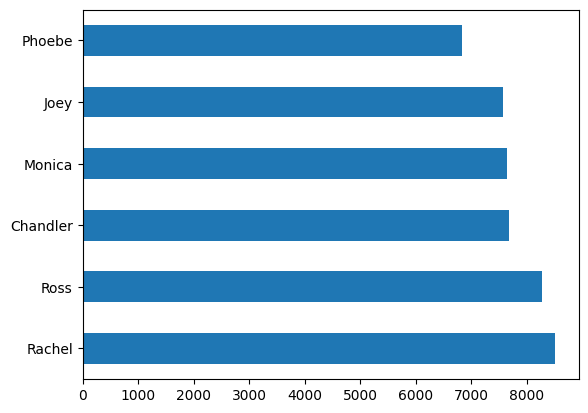

In [85]:
ax = friends_df['character'].value_counts().plot(kind='barh')

**Your answer:**

The plot shows that Rachel has the most number of lines and Phoebe the least amount of lines. Joey, Monica and Chandler nearly have the same amount of lines. Same goes for Ross and Rachel.

#### **a(iii)**  
Create a corpus named `corpus` such that each document in the corpus corresponds to exactly one row's "line" in `friends_df`.

In [86]:
corpus = friends_df['line'].to_numpy()

#### **a(iv)**  
Write a function called `my_preprocessor` which, given a string, returns another string after tokenization, stopword removal and lemmatization have been applied. The remaining terms (tokens after stopword removal and lemmatization has been applied) should be joined in the same string using space ' '.

In [87]:
# your code
import nltk
#for sentence tokenization, word tokenization
from nltk.tokenize import sent_tokenize, word_tokenize

#for tokenization and punctuation removal 
from nltk.tokenize import RegexpTokenizer
nltk.download('punkt')

#to filter out stop words
nltk.download("stopwords")
from nltk.corpus import stopwords

#for stemming
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

#for lemmatization
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4') # omw=open multilingual wordnet

#to compute frequency of text units
from nltk.probability import FreqDist

lemmatizer = WordNetLemmatizer()
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
stop_list = stopwords.words("english")


def my_preprocessor(line):
    processed = []
    tokenized = tokenizer.tokenize(line)
    filtered = [word.lower() for word in tokenized if word.lower() not in stop_list]
    lemmatized = [lemmatizer.lemmatize(word) for word in filtered]
    return ' '.join(lemmatized)

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jovyan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


#### **a(v)**   
You must apply your preprocessor `my_preprocessor` on each line contained in the `corpus`. Create a preprocessed corpus named `corpus_p` which contains the same lines as `corpus` after the preprocessor `my_preprocessor` has been applied.

In [88]:
from tqdm import tqdm
corpus_p = [my_preprocessor(line) for line in tqdm(corpus)]

100%|██████████| 46514/46514 [00:10<00:00, 4281.76it/s]


#### **a(vi)**   
Split the `friends_df` dataset from the previous task into training (80%) and test (20%) data preserving the distribution based on the "character" value. 

In [89]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(friends_df, test_size=0.2, random_state=42, stratify=friends_df["character"])

#### **a(vii)**   
Similar to **a(iii)**, for the training data and the test data, create two corpora named `corpus_train` and `corpus_test` respectively. Each document in the training (test) corpus must correspond to exactly one row's "line" value in the corresponding training (test) dataframe.

In [90]:
corpus_train = train['line'].to_numpy()
corpus_test = test['line'].to_numpy()

### b) Set of Words (4.5 pts)

#### **b(i)**  
We want to encode our text in such a way that for each word in the vocabulary, we are only interested in whether the word appears or not in a given document. Create such a Set of Words encoding for the whole corpus `corpus`. Use the previously defined preprocessor `my_preprocessor` as preprocessor.

In [91]:
sow = CountVectorizer(binary=True, preprocessor=my_preprocessor)

# set_of_words_for_corpus = list()

sow = sow.fit(corpus)

set_of_words_for_corpus = sow.transform(corpus)

vocabulary = sow.vocabulary_

#### **b(ii)**  
Pick one (any) of the lines of the "line" column in the `friends_df` dataset. Display the line in:
    1) its original form, 
    2) its preprocessed version (the result contained in `corpus_p` after applying `my_preprocessor`), and 
    3) its encoding computed by the Set of Words method. This can be either an array (a vector) or a scipy matrix. 
Briefly comment on the Set of Words encoding.

In [92]:
randomLine = friends_df['line'][1000]
print(f'Original form: {randomLine}')
print(f'Preprocessed form: {my_preprocessor(randomLine)}')
print(f'Number of 1s: { sow.transform([randomLine]).toarray().sum() }')
print(f'Encoding: { sow.transform([randomLine]).toarray()}')

Original form:  Nothing  nothing. Lee-lo  the laundry's done.
Preprocessed form: nothing nothing lee lo laundry done
Number of 1s: 5
Encoding: [[0 0 0 ... 0 0 0]]


**Your answer:**

The encoding has exactly 5 entries with a 1. These entries refer to 'nothing' (just once as we do not cover frequency), 'lee', 'lo', 'laundry' and 'done' 

#### **b(iii)**  
Create a Set of Words encoding based only on the documents in `corpus_train`. Use the previously defined preprocessor `my_preprocessor` as a preprocessor.

In [93]:
set_of_words_for_corpus_train = sow.transform(corpus_train)

In [94]:
set_of_words_for_corpus_test = sow.transform(corpus_test)

#### **b(iv)**  
In this task, we will use an SGD (Stochastic Gradient Descend) classifier to predict the character given a line from the corpus. Train the classifier on the Set of Words encoding of training corpus `corpus_train` using the character as the target feature and 'log_loss' as the loss function. Apply the classifier on the Set of Words encodings of both the training corpus and the test corpus `corpus_train`. Show its accuracy for both the training corpus and the test corpus.

In [95]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss='log_loss')

corpus_train_characters = list(train['character'])
corpus_test_characters = list(test['character'])

sgd_clf.fit(set_of_words_for_corpus_train, corpus_train_characters)

SGDClassifier(loss='log_loss')

In [96]:
acc_train = sgd_clf.score(set_of_words_for_corpus_train, corpus_train_characters)
acc_test = sgd_clf.score(set_of_words_for_corpus_test, corpus_test_characters)

print(f'Training accuracy: {acc_train} and testing accuracy: {acc_test}')

Training accuracy: 0.4222138614925694 and testing accuracy: 0.29151886488229606


#### **b(v)**  
Briefly comment on the accuracy of the classifier compared to the expected accuracy of a random guesser (here: a model that simply guesses each character according to a distribution based on the line count). Use the line count distribution shown in **a(ii)** to reason about the approximate accuracy of the random guesser.

**Your answer:**

The random guesser would have a probability of 1/6 (16.6667%) in the usual case. However, with the knowledge of the line count distribution the random guesser now has further insights that for example Phoebe does have significantly less lines than Rachel or Ross (so the random guesser will now choose Rachel and Ross more often than Phoebe). Therefore, the probability of a now not so random guesser would rise a little bit. 

The classifier does not predict well at all. With an accuracy of roughly 29.2% for the test corpus there is no significant difference to a random guesser that has insights in the line count distribution.

#### **b(vi)**  
Pick two lines from the dataset `friends_df`. Predict their character by applying the SGD classifier from **b(iv)** to their Set of Words encodings. Show the original lines, their original characters and the predicted characters.

In [97]:
first_line = friends_df['line'][100]
first_character = friends_df['character'][100]

second_line = friends_df['line'][200]
second_character = friends_df['character'][200]

corpus_for_two_instances = [first_line, second_line]

set_of_words_for_two_instances = sow.transform(corpus_for_two_instances)

predicted_characters = sgd_clf.predict(set_of_words_for_two_instances)

print(f'Original lines: {first_line} and {second_line}')

print(f'Predicted Characters: {predicted_characters[0]} and {predicted_characters[1]}. Original Characters: {first_character} and {second_character}')

Original lines:  Hey Pheebs  you wanna help? and  You got a job?
Predicted Characters: Joey and Rachel. Original Characters: Joey and Ross


### c) Doc2Vec (1.5 pts)

#### **c(i)**  
In this part, we want to encode the lines using Doc2Vec. Create a Doc2Vec embedding based on the documents in the preprocessed corpus `corpus_p`. Set the vector dimension to 10 and min_count to 3.

In [113]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(corpus_p)]

# determining parameters of the model   
doc2vec = Doc2Vec(vector_size=10, min_count=3, seed=42)

# building the vocabulary    
doc2vec.build_vocab(documents)

In [114]:
# document embedding, create the embedding based on all documents in the corpus
doc2vec.train(corpus_iterable=documents, total_examples=doc2vec.corpus_count, epochs=100)

#### **c(ii)**  
Pick one (any) line from the dataset `friends_df`. Display the line and the character saying it. Find its most similar line w.r.t. the Doc2Vec encoding and display the original line and its corresponding character. Do the lines belong to the same character?

In [115]:
tokenizer = nltk.RegexpTokenizer(r"\w+")

character = friends_df['character'][100]
line = friends_df['line'][100]

# infer_vector requires the sentence (=document) to be passed as a list of tokens
line_tokens = tokenizer.tokenize(line)

line_embedding = doc2vec.infer_vector(line_tokens)

most_similar_docs = doc2vec.dv.most_similar(line_embedding) #gives you top 10 document tags and their cosine similarity

tag = most_similar_docs[0][0] #obtain the tag of the first document'

print(f'Character: "{character}" says line: "{line}"')

print(f'Most similar line: {documents[tag].words}')

print(f'The most similar line belongs to {friends_df.iloc[tag].character}')

Character: "Joey" says line: " Hey Pheebs  you wanna help?"
Most similar line: 
The most similar line belongs to Joey


**Your answer:**

Yes the most similar line does belong to the same character. The line belongs to Joey.

### d) Language model using N-grams (2 pts)

#### For the following tasks, use the `friends_df` data.

#### **d(i)**  
For each character, create a corresponding corpus. Each corpus must be a list of documents. Each document corresponds to one "line" value of that character and it should be a list of terms. You must obtain this list of terms after applying preprocessing steps such as to lowercase, no punctuation, and tokenization to the original line. Do not perform stemming/lemmatization and/or stopword removal for this task.
Display the corpus of one of the characters.

#### **d(ii)**  
For each character separately, build a trigram language model using MLE. Use both right and left padding and learn each language model using the character's corpus from **d(ii)**.

In [258]:
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import MLE

padded_tuples_Rachel, vocab_Rachel = padded_everygram_pipeline(3, rachelsCorpus)
padded_tuples_Ross, vocab_Ross = padded_everygram_pipeline(3, rossCorpus)
padded_tuples_Chandler, vocab_Chandler = padded_everygram_pipeline(3, chandlersCorpus)
padded_tuples_Monicas, vocab_Monicas = padded_everygram_pipeline(3, monicasCorpus)
padded_tuples_Joeys, vocab_Joeys = padded_everygram_pipeline(3, joeysCorpus)
padded_tuples_Phoebes, vocab_Phoebes = padded_everygram_pipeline(3, phoebesCorpus)

rachelsTrigram = MLE(3)
rachelsTrigram.fit(padded_tuples_Rachel, vocab_Rachel)

rossTrigram = MLE(3)
rossTrigram.fit(padded_tuples_Ross, vocab_Ross)

chandlersTrigram = MLE(3)
chandlersTrigram.fit(padded_tuples_Chandler, vocab_Chandler)

monicasTrigram = MLE(3)
monicasTrigram.fit(padded_tuples_Monicas, vocab_Monicas)

joeysTrigram = MLE(3)
joeysTrigram.fit(padded_tuples_Joeys, vocab_Joeys)

phoebesTrigram = MLE(3)
phoebesTrigram.fit(padded_tuples_Phoebes, vocab_Phoebes)

#### **d(iv)**  
For each character, use the created trigram language model to generate a sentence of ten words. Display the sentences.

In [259]:
generatedSentencesRachel = rachelsTrigram.generate(10)
generatedSentencesRoss = rossTrigram.generate(10)
generatedSentencesChandler = chandlersTrigram.generate(10)
generatedSentencesMonica = monicasTrigram.generate(10)
generatedSentencesJoey = joeysTrigram.generate(10)
generatedSentencesPhoebe = phoebesTrigram.generate(10)

print(f'Rachels generated sentence: {generatedSentencesRachel}')
print(f'Ross generated sentence: {generatedSentencesRoss}')
print(f'Chandler generated sentence: {generatedSentencesChandler}')
print(f'Monica generated sentence: {generatedSentencesMonica}')
print(f'Joey generated sentence: {generatedSentencesJoey}')
print(f'Phoebes generated sentence: {generatedSentencesPhoebe}')

Rachels generated sentence: ['it', 's', 'an', 'antique', 'apothecary', 'table', 'she', 's', 'gonna', 'flip']
Ross generated sentence: ['m', 'going', 'to', 'paris', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>']
Chandler generated sentence: ['m', 'saying', 'that', 'she', 's', 'regional', 'vice', 'president', 'of', 'a']
Monica generated sentence: ['s', 'like', 'returning', 'to', 'the', 'park', 'huh', 'a', 'public', 'place']
Joey generated sentence: ['tickets', 'here', 'in', 'case', 'you', 'have', 'to', 'imagine', '</s>', '</s>']
Phoebes generated sentence: ['right', 'keep', 'up', 'the', 'sock', 'i', 'm', 'going', 'to', 'do']


## Question 5: Process Mining (22pts)

In [129]:
import pandas as pd
import pm4py

In [2]:
from pm4py.statistics.traces.generic.log import case_statistics

In [3]:
from pm4py.algo.conformance.tokenreplay import algorithm as token_based_replay

In [4]:
import matplotlib.pyplot as plt

### a) Loading the Data and Basic Statistics (9pts)

#### **a(i)** 
Load the data **reimburse.csv** and create a PM4Py event log. In doing so, use the following column mapping:
 - *Activity* is the activity key
 - *Case* is the case ID
 - *Timestamp* is the timestamp

In [131]:
data = pd.read_csv('datasets/reimburse.csv')
data = pm4py.format_dataframe(data, case_id='CaseId', activity_key='Activity', timestamp_key='Timestamp')
event_log = pm4py.convert_to_event_log(data)
event_log

[{'attributes': {'concept:name': '0'}, 'events': [{'Timestamp': Timestamp('2020-06-01 06:00:00+0000', tz='UTC'), 'CaseId': 0, 'Activity': 'Online', 'ModelTime': 0, 'Resource': '111', 'Brand': 'PEAR', 'concept:name': 'Online', 'time:timestamp': Timestamp('2020-06-01 06:00:00+0000', tz='UTC'), '@@index': 0}, '..', {'Timestamp': Timestamp('2020-06-03 09:52:18+0000', tz='UTC'), 'CaseId': 0, 'Activity': 'Pay', 'ModelTime': 186738, 'Resource': '2', 'Brand': 'PEAR', 'concept:name': 'Pay', 'time:timestamp': Timestamp('2020-06-03 09:52:18+0000', tz='UTC'), '@@index': 3}]}, '....', {'attributes': {'concept:name': '9999'}, 'events': [{'Timestamp': Timestamp('2022-02-05 20:00:11+0000', tz='UTC'), 'CaseId': 9999, 'Activity': 'Online', 'ModelTime': 53103611, 'Resource': '111', 'Brand': 'CP', 'concept:name': 'Online', 'time:timestamp': Timestamp('2022-02-05 20:00:11+0000', tz='UTC'), '@@index': 47826}, '..', {'Timestamp': Timestamp('2022-02-16 11:56:24+0000', tz='UTC'), 'CaseId': 9999, 'Activity': 'P

#### **a(ii)** 
Compute and print the following basic information:
- Number of events
- Number of cases
- Earliest timestamp
- Latest timestamp
- Number of trace variants

In [132]:
# each row corresponds to an event
numberOfEvents = len(data)
# count unique case ids
numberOfCases = data['CaseId'].nunique()
numberOfTraceVariants = len(pm4py.get_variants_as_tuples(event_log))
earliestTimestamp = data['Timestamp'].min()
latestTimestamp = data['Timestamp'].max()

print(f"We have {numberOfEvents} events, {numberOfCases} cases and {numberOfTraceVariants} trace variants. The earliest timestamp is {earliestTimestamp} and the latest is {latestTimestamp}")

We have 47830 events, 10000 cases and 266 trace variants. The earliest timestamp is 2020-06-01 06:00:00+00:00 and the latest is 2022-03-10 12:14:51+00:00


#### **a(iii)** 
In process mining, multiple events that have the same timestamp can cause problems because the ordering of events (or even activities) becomes unclear. Moreover, they can indicate batching (i.e., one activity is executed for multiple cases simultaneously). Therefore, during your analysis, it is good to keep that in mind. To this end, compute the following statistics/answer the following questions:

1. How many events occur almost at the same time (i.e., within less than 100ms as the preceding event. (Proceeding event in the *entire* event log)?
2. Are there resources that complete two activities at the same time (within less than 100ms)?
3. How many cases are there in which two activities are executed at the same time (i.e., two events that belong to the same case occur within less than 100ms)?

*Hint: Depending on how you find the answers, be careful about event orderings.*

In [133]:
data.head()

Timestamp  CaseId              Activity  ModelTime Resource  \
0 2020-06-01 06:00:00+00:00       0                Online          0      111   
1 2020-06-01 09:19:59+00:00       0          Register Low      11999        1   
2 2020-06-01 09:26:51+00:00       0  Ask if Reimbursement      12411        1   
3 2020-06-03 09:52:18+00:00       0                   Pay     186738        2   
4 2020-06-01 06:16:43+00:00       1                Online       1003      111   

  Brand case:concept:name          concept:name            time:timestamp  \
0  PEAR                 0                Online 2020-06-01 06:00:00+00:00   
1  PEAR                 0          Register Low 2020-06-01 09:19:59+00:00   
2  PEAR                 0  Ask if Reimbursement 2020-06-01 09:26:51+00:00   
3  PEAR                 0                   Pay 2020-06-03 09:52:18+00:00   
4    CP                 1                Online 2020-06-01 06:16:43+00:00   

   @@index  
0        0  
1        1  
2        2  
3        3  
4        4

In [134]:
# 1
data_sorted = data.sort_values('Timestamp')
data_sorted = data_sorted.set_index(data_sorted['Timestamp'])
data_sorted_resource = data_sorted.filter(["Resource"])
data_sorted_caseid = data_sorted.filter(["CaseId"])

num_concurrent_events = int(data_sorted_resource.rolling('100ms', min_periods=2, closed="both").count().count())
print(f"We observe {num_concurrent_events} events that are occuring after an event within a 100ms.")

We observe 688 events that are occuring after an event within a 100ms.


In [135]:
# 2
data_sorted_grouped_per_resource = data_sorted_resource.groupby("Resource")
resource_dfs = [data_sorted_grouped_per_resource.get_group(resource) for resource in data_sorted_grouped_per_resource.groups]
for resource_df in resource_dfs:
    resource = resource_df.head(1)["Resource"][0]
    num_concurrent_activities_for_resource = int(resource_df.rolling('100ms', min_periods=2, closed="both").count().count())
    if num_concurrent_activities_for_resource == 0:
        print(f"Resource {resource} does *not* perform activities at the same time.")
    else:
        print(f"Resource {resource} *does* perform activities at the same time.")

Resource 1 does *not* perform activities at the same time.
Resource 111 does *not* perform activities at the same time.
Resource 2 does *not* perform activities at the same time.
Resource 20 does *not* perform activities at the same time.
Resource 5 does *not* perform activities at the same time.
Resource ~1 does *not* perform activities at the same time.


In [136]:
#3
from tqdm import tqdm

data_sorted_grouped_per_case = data_sorted_caseid.groupby("CaseId")

case_that_have_at_least_two_concurrent_activities = 0
for case_group in tqdm(data_sorted_grouped_per_case.groups):
    case_df = data_sorted_grouped_per_case.get_group(case_group)
    caseid = case_df.head(1)["CaseId"][0]
    num_concurrent_activities_for_case = int(case_df.rolling('100ms', min_periods=2, closed="both").count().count())
    case_that_have_at_least_two_concurrent_activities += int(num_concurrent_activities_for_case != 0)
    
print(f"The number of cases that have at least two activities that happened simultanously is {case_that_have_at_least_two_concurrent_activities}.")

100%|██████████| 10000/10000 [01:04<00:00, 154.08it/s]

The number of cases that have at least two activities that happened simultanously is 21.


#### **a(iv)** 
Provide a plot that shows the number of running cases (i.e., cases that have started but not yet finished) over time. You may assume that the log only contains complete traces. For each case that has started, its completion is the last observed event associated with that case. In case multiple cases start or end at the same time, you also generate multiple values.

In [137]:
start_activities = list(pm4py.get_start_activities(event_log).keys())
end_activities = list(pm4py.get_end_activities(event_log).keys())
running_cases_counter = 0
running_cases = []

for index, event in tqdm(data_sorted.iterrows(), total=len(data_sorted), position=0, leave=True):
    a_case_is_starting = event["Activity"] in start_activities
    a_case_is_ending = event["Activity"] in end_activities
    
    assert not (a_case_is_starting and a_case_is_ending)
    
    running_cases_counter += int(a_case_is_starting)
    running_cases_counter -= int(a_case_is_ending)
    
    running_cases.append(running_cases_counter)
    
assert running_cases_counter == 0

100%|██████████| 47830/47830 [00:12<00:00, 3829.56it/s]


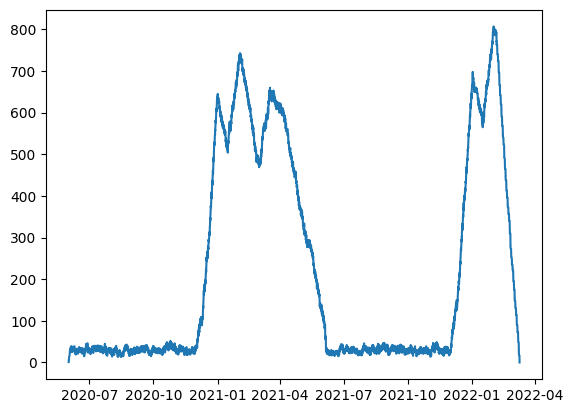

In [138]:
# Describe the plots
# There is no model here, is a typo !?
plt.plot(data_sorted["Timestamp"], running_cases)
plt.show()

**Your answer**: *(Briefly describe the differences between the two models in about five sentences here.)*

We can observe two spikes. The first one starts at the beginning of 2021 and ends at the beginning of June 2021. The second starts at the beginning of 2022 and ends at the beginning of March 2022. The first spike peaks at about 750 and the second one peaks at about 800. The rest of the time the number stays stable with around 50 concurrently running cases.

### b) Discovery and Conformance Checking (9pts)

#### **b(i)** 
Mine a Petri net using Inductive Miner and display it.

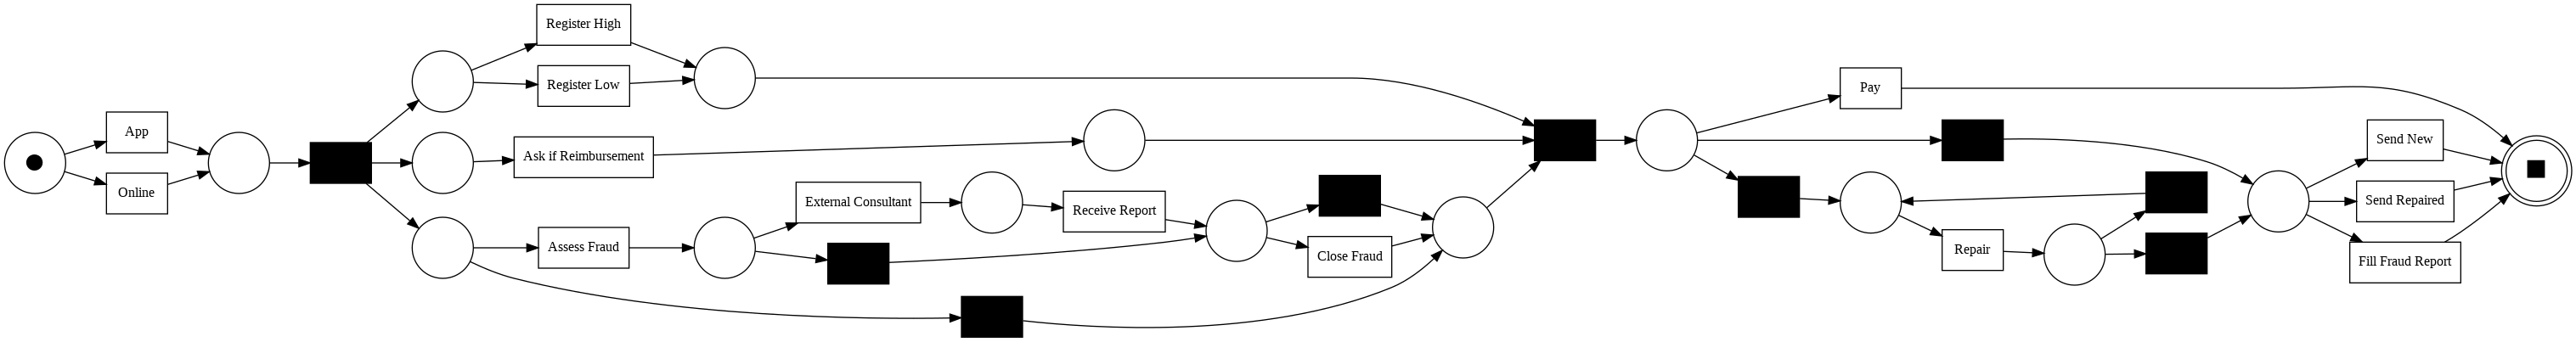

In [139]:
net, im, fm = pm4py.discover_petri_net_inductive(event_log)
pm4py.view_petri_net(net, im, fm, format='png')

#### **b(ii)** 
Compute the fitness of the discovered Petri net using token-based replay.

*Hint: PM4Py can directly (using the top-level API) compute the number of missing, remaining, consumed, and produced tokens. Based on these, you can, for example, compute the token-based replay fitness.*

In [140]:
# Obtain the number of missing, remaining, consumed and produced tokens
replayed_traces =  pm4py.conformance_diagnostics_token_based_replay(event_log, net, im, fm)
result = {k: sum(d[k] for d in replayed_traces) for k in ['missing_tokens','consumed_tokens','remaining_tokens','produced_tokens']}

# Compute the fitness of the Petri net
fitness = (1/2 * (1 - (result['remaining_tokens']/result['produced_tokens']))) + (1/2 * (1 - (result['missing_tokens']/result['consumed_tokens'])))
print('Fitness of the discovered Petri net:', fitness)

replaying log with TBR, completed variants ::   0%|          | 0/266 [00:00<?, ?it/s]

Fitness of the discovered Petri net: 1.0


#### **b(iii)** 
Filter the log to contain only traces where *Register Low* occurs. How many traces does the resulting log `log_low` contain?


In [141]:
# Filter the log
log_low = pm4py.filter_event_attribute_values(event_log, "concept:name", ["Register Low"], level="case", retain=True)
log_low_df = pm4py.convert_to_dataframe(log_low)

# Obtain total traces
print('Total number of traces:', log_low_df['CaseId'].nunique())

Total number of traces: 7021


#### **b(iv)** 
Discover a Petri net for `log_low` and compute its fitness. How does this model differ from the model you discovered in *b(i)*? 

Suppose each of your produced process models is considered a 2-class classifier: provided a trace, it returns "Yes" if and only if the trace can be replayed by the model. Based on this perspective, how would the two process models compare in terms of precision?

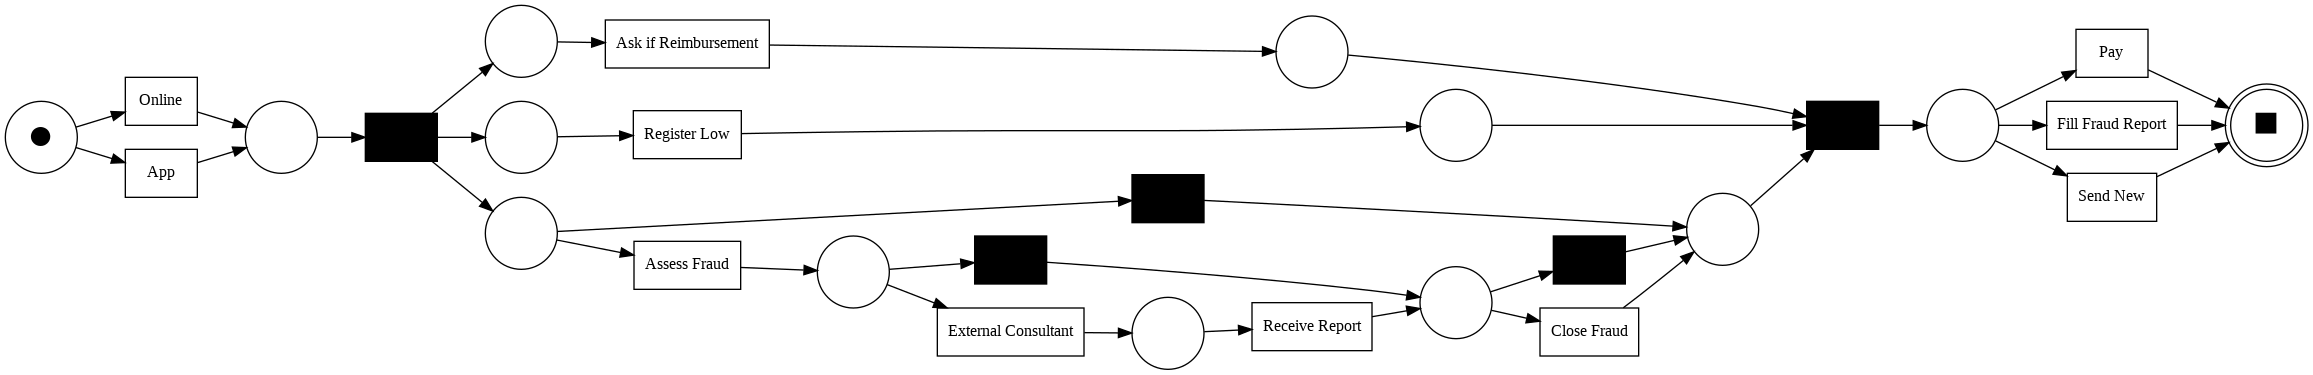

aligning log, completed variants ::   0%|          | 0/94 [00:00<?, ?it/s]

Fitness of the discovered Petri net for log_low: 0.9999638796867909


In [142]:
# Petri net  for log_low
net_low, im_low, fm_low = pm4py.discover_petri_net_inductive(log_low)

# Display Petri net
pm4py.view_petri_net(net_low, im_low, fm_low, format='png') 

# Compute its fitness
from pm4py.algo.conformance.alignments.petri_net import algorithm as alignments
aligned_traces = alignments.apply_log(log_low, net_low, im_low, fm_low)

from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness
log_low_fitness = replay_fitness.evaluate(aligned_traces, variant=replay_fitness.Variants.ALIGNMENT_BASED)

print('Fitness of the discovered Petri net for log_low:', log_low_fitness['log_fitness'])

In [143]:
# Precision for event_log
precision_tbr = pm4py.precision_token_based_replay(event_log, net, im, fm)
print('Precision for event_log: ', round(precision_tbr,2))

# Precision for Log_low
precision_tbr_low = pm4py.precision_token_based_replay(log_low, net_low, im_low, fm_low)
print('Precision of Log low: ', round(precision_tbr_low,2))

replaying log with TBR, completed variants ::   0%|          | 0/354 [00:00<?, ?it/s]

Precision for event_log:  0.78


replaying log with TBR, completed variants ::   0%|          | 0/138 [00:00<?, ?it/s]

Precision of Log low:  0.9


**Your answer:** *(Briefly describe the difference between the two models here. About two sentences can be enough.*)

The second model is a sub model of the first one. As we can observe, the second model we are missing some transitions, including:

- Register High
- Repair
- Send Repaired

However, the second one still has a very good fitness score but has a significantly higher precision. This indicates that those transitions are not part of a frequent trace variants this otherwise would would have a strong fitness decrease.

**Your answer**: *(Relate your observations to precision here.)*

The first model was discovered using all the traces and its finess is equal to 1, meaning that all the traces follows the discovered petri net.
However, in the second model, which was discovered using only the traces where 'Register low' occurs, we observe that the fitness has decreased to 0.99, which means that there is some trace that does not follow the model and therefore will be neccesary to correct the problem by adding missing tokens.
After computing the precision we realized the second model is more precise than the first one, eventhough its fitness is lower. This is mainly because the first one is simple and as filtering the data we restricted our cases to the ones that only contain 'Register Low'. With a simple model, we obtained less transitions which means less probabilities to get a "mistake".

### Conformance Diagnostics De-jure Model
The process owner provides you a de-jure model (i.e., a model of the should-be process) and a slightly changed version of the so far considered event log. 

In this task, you will again apply conformance checking by means of token-based replay to provide diagnostics on deviations.

#### **b(v)** 
Load the Petri net *pn_conf.apnml*, the event log *log_conf.xes*, and provide the overall (i.e., model-based) token-based replay fitness score.



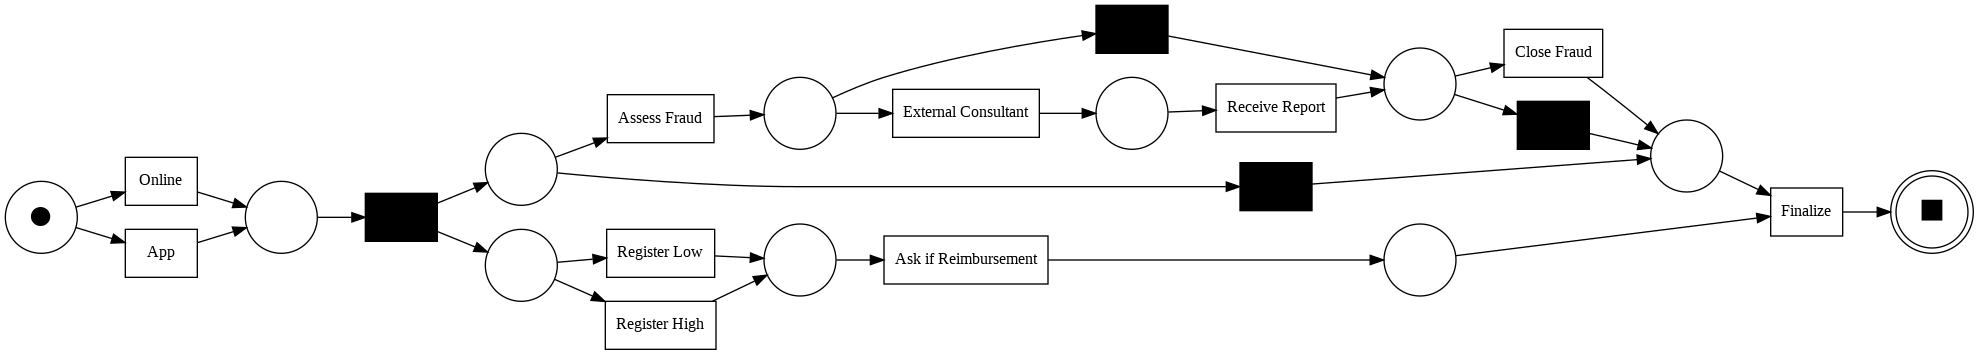

parsing log, completed traces ::   0%|          | 0/10000 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/122 [00:00<?, ?it/s]

Fitness of the discovered Petri net:  0.989


In [144]:
# Load Petri net and display it
net_conf, im_conf, fm_conf = pm4py.read_pnml('datasets/pn_conf.apnml')
pm4py.view_petri_net(net_conf, im_conf, fm_conf, format='png')

# Read long_conf.xes
log_conf = pm4py.read_xes('datasets/log_conf.xes') 

# Obtaining tokens 
replayed_traces =  pm4py.conformance_diagnostics_token_based_replay(log_conf, net_conf, im_conf, fm_conf)
result = {k: sum(d[k] for d in replayed_traces) for k in ['missing_tokens','consumed_tokens','remaining_tokens','produced_tokens']}

# Compute overall fitness score
fitness = (1/2 * (1 - (result['remaining_tokens']/result['produced_tokens']))) + (1/2 * (1 - (result['missing_tokens']/result['consumed_tokens'])))
print('Fitness of the discovered Petri net: ', round(fitness, 3))

#### **b(vi)** 
To provide additional diagnostics on the deviations, compute the missing, consumed, produced and remaining number of tokens for **each place**. 
To do so, use the following *pm4py* code:
    
    from pm4py.algo.conformance.tokenreplay import algorithm as token_based_replay
	tbr_results, place_fitness, transition_fitness, notexisting_activities_in_model =
    token_based_replay.apply(log_conf, net_conf, im_conf, fm_conf, parameters={"enable_pltr_fitness": True, "disable_variants": True})

After running this line for log `log_conf`, Petri net `net_conf` with initial marking `im_conf` and final marking `fm_conf`, the variable `place_fitness` will contain the token counts for each place and trace. Therefore, you will only need aggregate over the traces.
Print a table of the token counts per place. 


In [145]:
# Compute the tokens for each place
from pm4py.algo.conformance.tokenreplay import algorithm as token_based_replay
tbr_results, place_fitness, transition_fitness, notexisting_activities_in_model = token_based_replay.apply(log_conf, net_conf, im_conf, fm_conf, parameters={"enable_pltr_fitness": True, "disable_variants": True})

keys = list(place_fitness.keys())
tokens = ['m', 'r', 'c', 'p']
data = []
places_table = pd.DataFrame(index=tokens)

for key in range(len(keys)):
    row = []
    for token in tokens:
        row.append(place_fitness.get(keys[key])[token])
    places_table[keys[key]] = row
    
display(places_table)

replaying log with TBR, completed variants ::   0%|          | 0/10000 [00:00<?, ?it/s]

n1  n3     n6    n10     n2    n4     n5     n7     n8    n9    n11
m    899   0      0      0      0     0      0      0      0     0      0
r    899   0      0      0      0     0      0      0      0     0      0
c  10000  99  10000  10000  10000  1917  10000  10000  10000  1917  10000
p  10000  99  10000  10000  10000  1917  10000  10000  10000  1917  10000

#### **b(vii)** 
Consider the token counts per place and a few unfitting traces, which deviation(s) do you observe? Describe the deviation and briefly explain how it can be related to the token counts of the individual places. For example, activity *xy* is often missing resulting in a high number of missing tokens in place *p*.  


In [146]:
# Show unfitting traces
count = 0
for index in range(len(tbr_results)):
    if tbr_results[index]['trace_is_fit'] == False and count < 3 :
        display(tbr_results[index])
        count += 1

{'trace_is_fit': False,
 'trace_fitness': 0.9,
 'activated_transitions': [(n18, 'Online'),
  (n12, 'Ask if Reimbursement'),
  (n21, None),
  (n13, 'Assess Fraud'),
  (n22, 'Register High'),
  (n25, None),
  (n17, 'Close Fraud'),
  (n16, 'Finalize')],
 'reached_marking': ['n1:1', 'n5:1'],
 'enabled_transitions_in_marking': {(n12, 'Ask if Reimbursement')},
 'transitions_with_problems': [(n12, 'Ask if Reimbursement')],
 'missing_tokens': 1,
 'consumed_tokens': 10,
 'remaining_tokens': 1,
 'produced_tokens': 10}

{'trace_is_fit': False,
 'trace_fitness': 0.875,
 'activated_transitions': [(n18, 'Online'),
  (n12, 'Ask if Reimbursement'),
  (n21, None),
  (n19, 'Register Low'),
  (n23, None),
  (n16, 'Finalize')],
 'reached_marking': ['n1:1', 'n5:1'],
 'enabled_transitions_in_marking': {(n12, 'Ask if Reimbursement')},
 'transitions_with_problems': [(n12, 'Ask if Reimbursement')],
 'missing_tokens': 1,
 'consumed_tokens': 8,
 'remaining_tokens': 1,
 'produced_tokens': 8}

{'trace_is_fit': False,
 'trace_fitness': 0.875,
 'activated_transitions': [(n20, 'App'),
  (n12, 'Ask if Reimbursement'),
  (n21, None),
  (n19, 'Register Low'),
  (n23, None),
  (n16, 'Finalize')],
 'reached_marking': ['n1:1', 'n5:1'],
 'enabled_transitions_in_marking': {(n12, 'Ask if Reimbursement')},
 'transitions_with_problems': [(n12, 'Ask if Reimbursement')],
 'missing_tokens': 1,
 'consumed_tokens': 8,
 'remaining_tokens': 1,
 'produced_tokens': 8}

**Your answer:** *(Describe the deviation(s). One sentence can already be enough.)*

For some cases, users do not perform "Register (Low or High)" before the activity "Asking if reimbursement", forcing the model to produce a token in front of it, therefore ending up with a missing token in place 'n1' (see final marking "n1:1" in all three traces).

**Your answer:** (*Relate the deviation(s) to the token counts of the individual places. Roughly five sentences can be enough for a precise description.*)

One can see that most of unfitting traces have transitions with problems related to activity 'Ask if Reimbursement' and its input place 'n1'. In place 'n1' it seems like 899 tokens were missing in place 'n1' during replay because 'Ask if Reinbursement' happened while this was not possible according to the model since 'Register (Low or High)' were not yet observed. Besides, 899 tokens remain in place 'n1' because 'Register (Low or High)' occured *after* 'Ask if Reimbursement' occured in the trace. Therefore, the token that were stuck at 'Register (Low or High)' went to n1 and got (since 'Ask if Reimbursement' already occured).

### c) Analyzing Fraud (4pts)

#### **c(i)** 
Filter the event log so that it only contains traces where a fraud report is filled (occurrence of `Fill Fraud Report`). For theses traces, create a bar plot showing the number of products of a certain brand involved in the fraud. Describe the resulting plot.

*Hint: Each case is associated with precisely one brand.*


<AxesSubplot:title={'center':'Number of products per brand involved in the fraud'}, xlabel='Brand'>

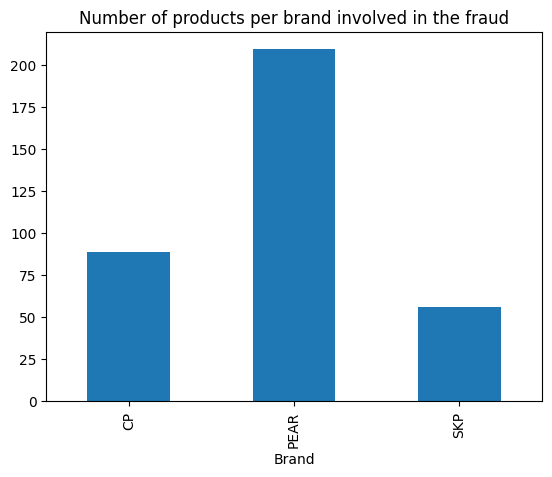

In [163]:
# Filter the event log
log_fraud = pm4py.filter_event_attribute_values(event_log, "concept:name", ["Fill Fraud Report"], level="case", retain=True)

# Convert to dataframe to use groupby
log_normal = pm4py.convert_to_dataframe(event_log) 
log_fraud = pm4py.convert_to_dataframe(log_fraud)

data_plot_normal = log_normal.groupby('Brand')['CaseId'].nunique()
data_plot_fraud = log_fraud.groupby('Brand')['CaseId'].nunique()

# PLot the results
data_plot_fraud.plot(x='Brand', y='Number of products', kind='bar', title='Number of products per brand involved in the fraud')

**Your answer:** (*Describe the plot in two to three sentences.*)

The chart illustrates the number of products a brand (CP, PEAR, SKP) involved in the fraud. Overall and taking into account that there are 354 products involved in fraud, PEAR’s products, with more than 50% of them, were the most involve brand in this process whereas the least number of products involved were comprised by SKP. Regarding CP products, 25% of them were compromised in fraud.

#### **c(ii)**  
The plot shows differences between brands. Discuss the result. Consider what you learned in Lecture 11 (association rules). Try to provide additional analysis results to underpin your discussion.

*Hint: A very short additional analysis (i.e., a few lines of code) might already be sufficient.*


In [164]:
data_plot_fraud / data_plot_normal

Brand
CP      0.041550
PEAR    0.035358
SKP     0.028762
Name: CaseId, dtype: float64

**Your answer:** *(Relate your results to Lecture 11, approximately one short paragraph)*

Considering all the event_log dataset, we observe that the plot above makes sense as vast majority of cases comprised the brand PEAR, following by CP and lastly SKP. But when looking at the support of cases that are deemed to be fraud we see that CP with a "fraud rate" of 4%. But does not differ much from the other brands.

## Question 6 - Simpson's Paradox (3 pts)

### Sex Bias in Berkeley Graduate Admissions?

In the Fall of 1973, the University of California at Berkeley released data about their graduate class. The data showed the major the applicant applied to, their self-reported gender (Male or Female), and whether or not they were accepted or rejected. The acceptance rates between men and women were different. This caused immediate concern in the public as people thought that Berkeley was biased against women.

The "Berkeley Dataset" contains all 12,763 applicants to UC-Berkeley's graduate programs in Fall 1973. This dataset was published by UC-Berkeley researchers in an analysis to understand the possible gender bias in admissions.

Dataset Variables:

Year : number ➜ The application year (this value is always 1973)

Major : string ➜: An anonymized major code (either A, B, C, D, E, F, or Other). The specific majors are unknown except that A-F are the six majors with the most applicants in Fall 1973

Gender : string ➜ Applicant self-reported gender (either M or F)

Admission: string ➜ Admission decision (either Rejected or Accepted)

**a)**
Upload the data from the `berkeley.csv` file and load it into a dataframe named `data`. Display the first few lines from the dataframe.

In [117]:
data = pd.read_csv('datasets/berkeley.csv')
data.head()

Year  Major Gender Admission
0  1973      C      F  Rejected
1  1973      B      M  Accepted
2  1973  Other      F  Accepted
3  1973  Other      M  Accepted
4  1973  Other      M  Rejected

**b)** Remove the "Year" column as it does not contain any information in this dataset (all years are 1973.)

In [118]:
dataWithoutYear = data.drop('Year', axis=1)
dataWithoutYear.head()

Major Gender Admission
0      C      F  Rejected
1      B      M  Accepted
2  Other      F  Accepted
3  Other      M  Accepted
4  Other      M  Rejected

**c)** For each of the values of column "Gender", compute the admission rate and compare them against each other.

In [119]:
values = dataWithoutYear.value_counts(['Gender', 'Admission']).keys().tolist()
counts = dataWithoutYear.value_counts(['Gender', 'Admission']).tolist()
admissionRateMen = counts[1] / (counts[0] + counts[1])
admissionRateWomen = counts[3] / (counts[2] + counts[3])
numberOfMen = counts[0] + counts[1]
numberOfWomen = counts[2] + counts[3]
print(f'We obtain following admission rates: men = {admissionRateMen} and women = {admissionRateWomen}. We have a total of {numberOfMen} men and {numberOfWomen} women.')

We obtain following admission rates: men = 0.4427860696517413 and women = 0.3457532978477204. We have a total of 8442 men and 4321 women.


**Your answer:**
We can observe a 10% higher admission rate for men in comparison to women.

**d)** For each value combination of the "Gender" and "Major" columns, compute the admission rate. Compare the admission rate of women against the admission rate of men for each of the majors.

In [120]:
from collections import defaultdict

# (#accepted, #total_processes)
accepted_counts = defaultdict(lambda: (0, 0))

for _, admission_decision in tqdm(dataWithoutYear.iterrows(), total=len(dataWithoutYear), position=0, leave=True):
    major = admission_decision["Major"]
    gender = admission_decision["Gender"]
    was_accepted = admission_decision["Admission"] == "Accepted"
    admission_process_key = major, gender
    currently_accepted, currently_total = accepted_counts[admission_process_key]
    accepted_counts[admission_process_key] = (currently_accepted + int(was_accepted), currently_total + 1)

100%|██████████| 12763/12763 [00:03<00:00, 4231.83it/s]


In [126]:
acceptance_data = {k: accepted / total for k, (accepted, total) in accepted_counts.items()}

for (major, _) in sorted(acceptance_data.keys())[::2]:
    admission_diff = round(acceptance_data[major, "F"] - acceptance_data[major, "M"], 3)
    print(30 * "=")
    print("Major: \t", major)
    print("F: \t", acceptance_data[major, "F"])
    print("F (count): \t", accepted_counts[major, "F"][1])
    print("M: \t", acceptance_data[major, "M"])
    print("M (count): \t", accepted_counts[major, "M"][1])
    print("F - M: \t", "+" if admission_diff >= 0 else "-", abs(admission_diff) * 100, "%")
    
    
print(accepted_counts)

Major: 	 A
F: 	 0.8240740740740741
F (count): 	 108
M: 	 0.7249560632688928
M (count): 	 1138
F - M: 	 + 9.9 %
Major: 	 B
F: 	 0.68
F (count): 	 25
M: 	 0.6303571428571428
M (count): 	 560
F - M: 	 + 5.0 %
Major: 	 C
F: 	 0.33895446880269814
F (count): 	 593
M: 	 0.36923076923076925
M (count): 	 325
F - M: 	 - 3.0 %
Major: 	 D
F: 	 0.34933333333333333
F (count): 	 375
M: 	 0.33093525179856115
M (count): 	 417
F - M: 	 + 1.7999999999999998 %
Major: 	 E
F: 	 0.23918575063613232
F (count): 	 393
M: 	 0.2774869109947644
M (count): 	 191
F - M: 	 - 3.8 %
Major: 	 F
F: 	 0.07331378299120235
F (count): 	 341
M: 	 0.058981233243967826
M (count): 	 373
F - M: 	 + 1.4000000000000001 %
Major: 	 Other
F: 	 0.37691069991954945
F (count): 	 2486
M: 	 0.40952556086796615
M (count): 	 5438
F - M: 	 - 3.3000000000000003 %
defaultdict(<function <lambda> at 0x40b86e25e0>, {('C', 'F'): (201, 593), ('B', 'M'): (353, 560), ('Other', 'F'): (937, 2486), ('Other', 'M'): (2227, 5438), ('F', 'F'): (25, 341), ('A

**Your answer:**
The admission rate for women is higher than for men in 4 out of 7 majors, namely: A, B, D and F. 

**e)** Can you confirm there is a sex bias in the admission rates of the students?


**Your answer:**
As we already concluded for 4 out ouf 7 majors the admission rate is higher for women and for the others the admission rate for men is higher. In most cases there is no sex bias (we deem a difference up to 4% not as significant). However, there are significant differences in major A and B with a 9.9% and 5% more acceptance of women than men. But when looking at the absolute numbers we can see that we cannot assume a sex bias since we do not have a balanced admission count for the two sexes. When, for example, 50% of the places are occupied with woman and 50% of the places are given to men and nearly 10 times more men have applied (which is the case in major A), then the ratio for men is bad.

## Question 7: Big Data (15pts)

In [30]:
import pandas as pd

You are a data scientist at NASA, an agency for civil space programs, and with your team you develop and maintain the software of the NASA Crew Exploration Vehicle (CEV).  Your task is to analyze the performance of the software, and as a first exploratory step, you would like to **compute the mean execution times** of function calls within that software. Since the running vehicle will generate a high throughput of observable events in a stream, you decide to set up a MapReduce pipeline in Hadoop. 

The file **nasa-cev-software-tests.tsv** records timestamped events of the vehicle's software tests. The log contains the columns *Case*, *Activity* and *Timestamp*, denoting the case ID, the activity key (method call) and timestamp of the event record in nanoseconds, respectively. Furthermore, the log contains the columns *Lifecycle Transition* and *Execution ID*. The lifecycle transition takes either of the values *start* and *complete*, stating whether the corresponding activity (method call) in that row is being started or completed at the specified timestamp. The execution ID relates each event to a concrete method call, i.e., for each execution ID, there are exactly two entries (namely a *start* and a *complete* event) in the log.

### a) Plan the Maths (2pt):

The mean $\mu_n$ over numerical values $v_1,...,v_n$ is well-known to be computed as $\mu_n = \frac{1}{n}\sum_{i=1}^{n} v_i$.\
One may also use the alternative recursive formalization $\mu_{n+m} = \frac{n\cdot\mu_{n} + m\cdot\mu_{m}}{n+m}$. \
What is the advantage of using the alternative formalization when you think of handling streaming data or distributed data? Briefly explain.

**Your answer:**
The main advantage is that the mean of n and m can be compute in two different nodes in parallel gaining high concurrency, scalability and fault tolerance. For streaming it also convenient since we can update the mean when data comes in without recomputing it over all (historical) data.

### b) Set up MapReduce (10pts)

Realize the computation of the mean execution times of activities as a MapReduce job. 
You need to implement this a cascaded MapReduced job. This means that the output of the first job will serve as the input of the second job. In the first job, derive the execution times of each activity execution, i.e. the time difference between the *complete* and the *start* lifecycle transition of each activity execution. In the second step, aggregate this timing information to compute the mean.

#### **b(i)** 
Specify the *function signatures* of the map functions and the reduce functions that you are going to use.\
I.e., find concrete sets to substitute $K_1, V_1, ... $ in the general signatures for map and reduce functions 

$ map:  K_1 \times V_1 \rightarrow (K_2 \times V_2)^* $\
$ reduce: K_2 \times (V_2)^* \rightarrow (V_3)^*$ (or a singleton $V_3$) 

*Hint: You may introduce symbols to denote sets, e.g. $Act$ for the set of activities.\
You may also first implement the solution (b(ii)) to get an idea about the underlying signatures.\
Mind that you need two map and two reduce functions.*

**Your answer:**

For first MapReduce job:

**K1:** Set of all possible event logs **{EvenLogs}** \
**V1:** Set of all posible attributes for the events **{Att}** \
**K2:** Set of all possible execution ids **{Ex}** \
**V2:** Tuple of all possibles pairs actvity name and timestamp for each execution id **{Act_Time}** \
**V3:** Time difference for each activity execution **{TimeDiff}**

For second MapReduce job: 

**K1:** Set of of all possible activity executions **{Act}** \
**V1:** Set of all posible time difference **{TimeDiff}** \
**K2:** Set of all possible activities executions **{Act}** \
**V2:** Set of all tuples possibles of time difference and activity frecuency **{TimeDiff_Freq}** \
In this case we conidered the frequency to count the number of times a function was executed in order to later use it in the mean computation. \
**V3:** Mean time execution of each activity **{MeanTime}** 

#### **b(ii)**: 
Specify map functions and reduce functions to compute the mean execution time per activity as python scripts.

In [33]:
# your code (nasa_mapper1.py)
#!/usr/bin/env python

import sys

# input comes from STDIN
for event in sys.stdin:
    Att = event.split()
    print('%s-%s\t%s' % (Att[3], Att[0], Att[1]))

In [34]:
# your code (nasa_reducer1.py)
#!/usr/bin/env python

from operator import itemgetter
import sys

current_ex = None
current_time = 0

# input comes from STDIN

for ex in sys.stdin:

    ex = ex.strip('\n')
    exid, activity_timestamp = ex.split("-")
    activity, timestamp = activity_timestamp.split('\t')
    timestamp = int(timestamp)

    if current_case!=exid:
        if current_case:
            print('%s\t%s' % (activity, current_time))
        
        current_case = exid
        current_time = timestamp
    else:
        current_time -= timestamp 
        current_time = abs(current_time)

# output the last word
if current_ex == exid:
    print('%s\t%s' % (activity, current_time))

In [35]:
# your code (nasa_mapper2.py)
#!/usr/bin/env python
import sys

for kv_pair in sys.stdin:
    kv_pair = kv_pair.strip('\n')
    activity, time_difference = kv_pair.split('\t')
    print('%s\t%s\t%s' % (activity, time_difference, 1))

In [36]:
# your code (nasa_reducer2.py)
#!/usr/bin/env python

from operator import itemgetter
import sys

current_act = None
current_count = 0
current_mean = 0

# input comes from STDIN
for kv_pair in sys.stdin:
    kv_pair =  kv_pair.strip('\n')
    activity, time_difference, count = kv_pair.split('\t')

    time_difference = int(time_difference)
    count = int(count)

    if current_act!=activity:
        if current_act:
            print('%s\t%s' % (current_act, current_time/current_count))
            
        current_act = activity
        current_time = time_difference
        current_count = count
    else:
        current_time += time_difference
        current_count += count

# output the last activity
if current_act == activity:
    print('%s\t%s' % (current_act, current_time/current_count))

### c) Run MapReduce (3pts)

In the following, please use one of your team members' matriculation number as an identifier.

#### **c(i) (Randomization)**: 
Before applying your functions from the previous step to the dataset, please insert the matriculation number and run the following lines to randomly filter out a few of the traces in the event log, and continue working with the filtered log. 


In [37]:
# your matriculation number here
matr_nb = 448972

# utility code (do not change)
import random
random.seed(matr_nb)

full_df = pd.read_csv("datasets/nasa-cev-software-tests.tsv", sep="\t")

case_ids = list(set(full_df["Case"].values))
case_ids.sort()
filtered_out_case_ids = random.sample(case_ids, 10)
filtered_case_ids = [case_id for case_id in case_ids if case_id not in filtered_out_case_ids]
randomized_df = full_df[full_df["Case"].isin(filtered_case_ids)]

randomized_df.to_csv("datasets/nasa-cev-software-tests-randomized-" + str(matr_nb) + ".tsv",
          columns=["Activity", "Timestamp", "Lifecycle Transition", "Execution ID"],
          sep="\t", index=False, header=False)

#### **c(ii)**:
Now, it is time to work with the Hadoop Distributed File System (HDFS). Follow the instructions below and show your results in each step (screenshots of the command line).

    1) Import the event log to your Docker engine (at /usr/local/hadoop/(your_matr_nb)-event-log/). You also need to import the python scripts, but only document the event log import here.
    2) Upload the files to the running HDFS (at /input/(your_matr_nb)-event-log/).
	3) Run Hadoop commands for the MapReduce computation.
    4) Show the final output (computed mean execution times).

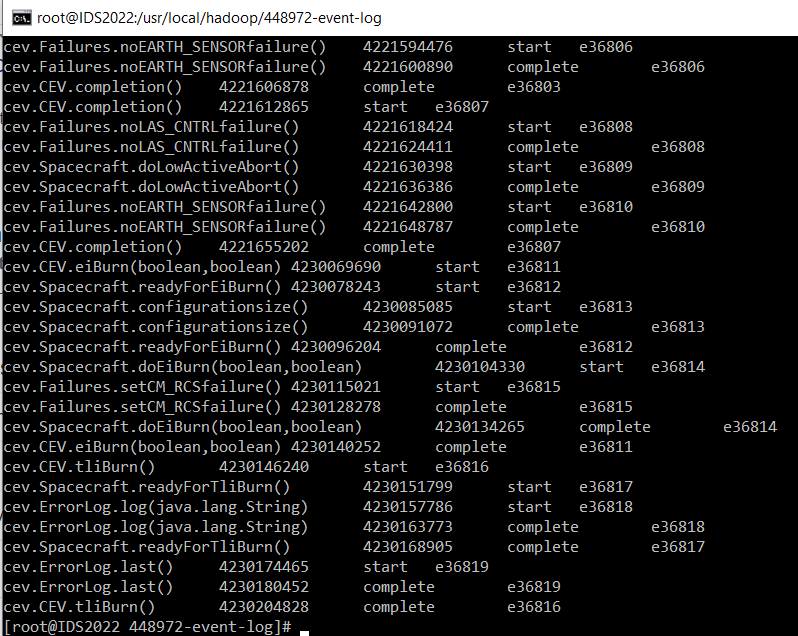

In [38]:
from IPython.display import Image
# your code
Image(filename='datasets/screenshot_of_a1.png')

# Command use to import the file form my local pc to docker: docker cp {CONTAINER_ID}:nasa-cev-software-tests-randomized-448972 /usr/local/hadoop/448972-event-log
# The screenshot shows the content of the file

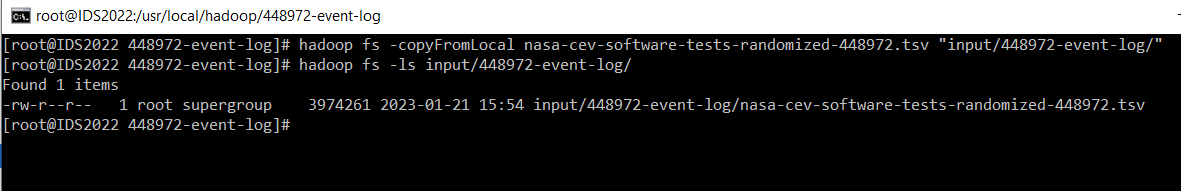

In [39]:
# your code
Image(filename='datasets/screenshot_of_a2.png')

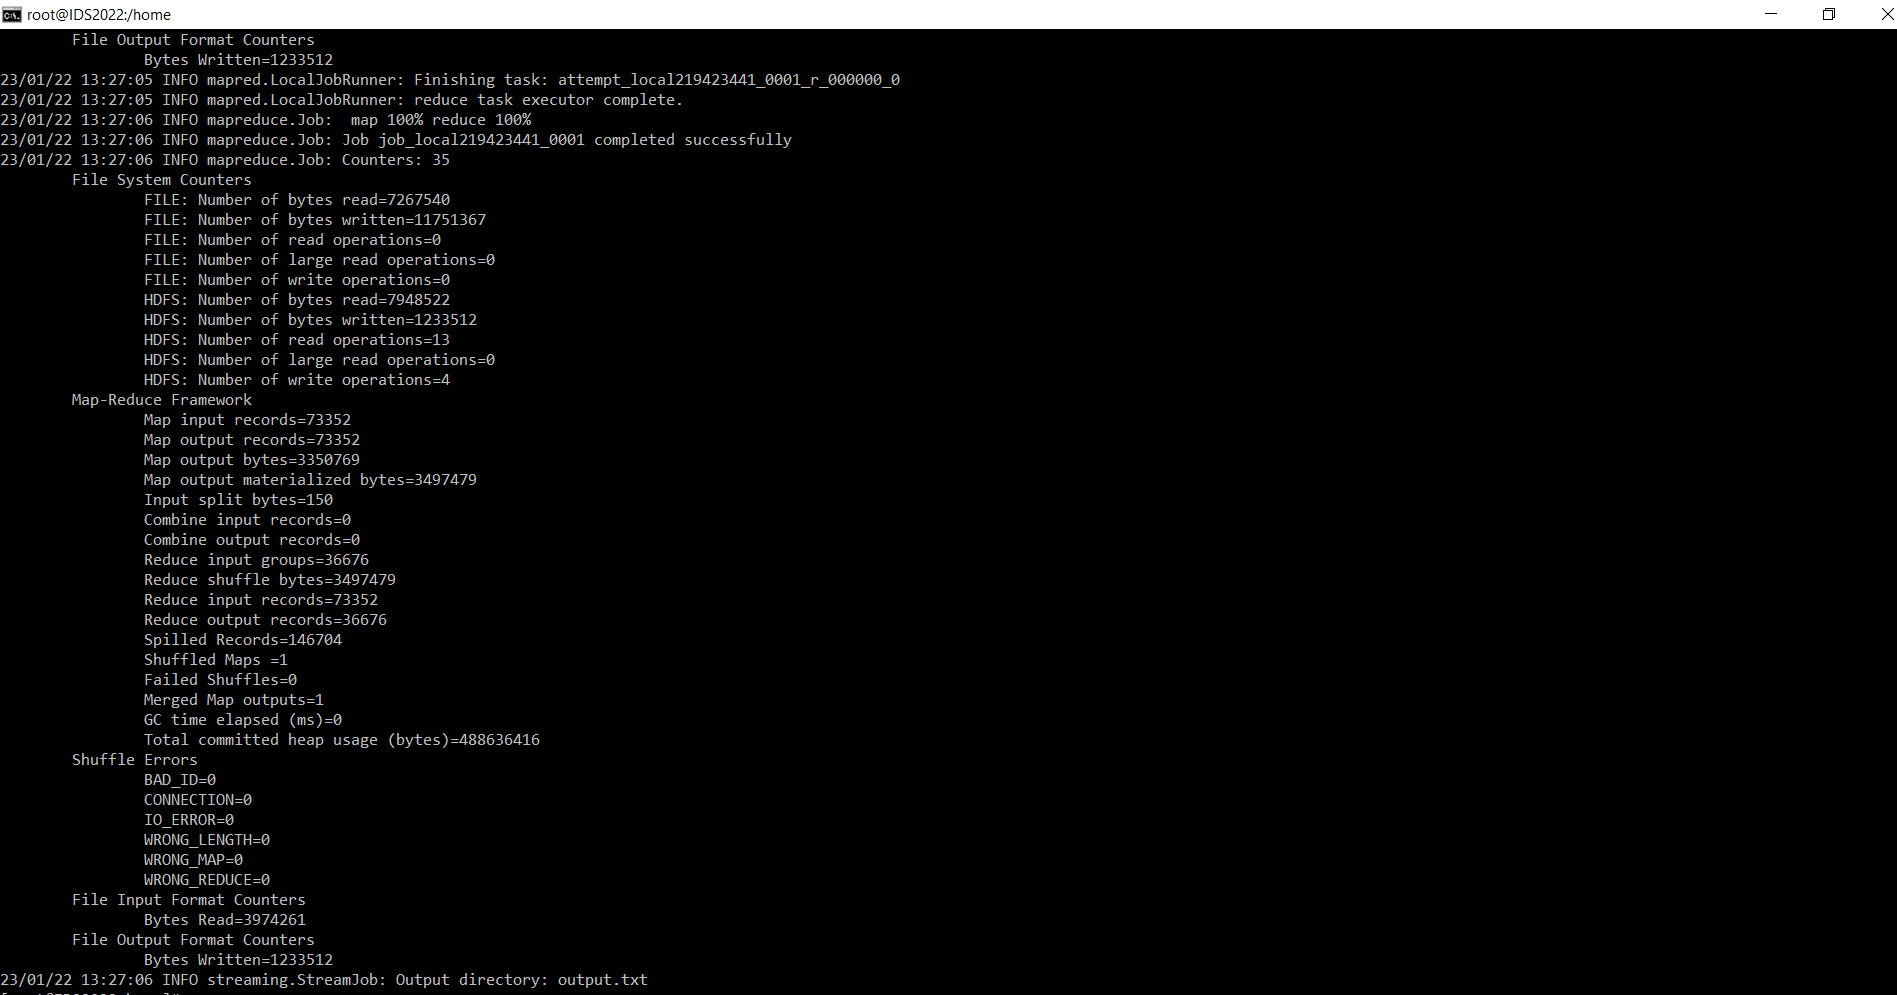

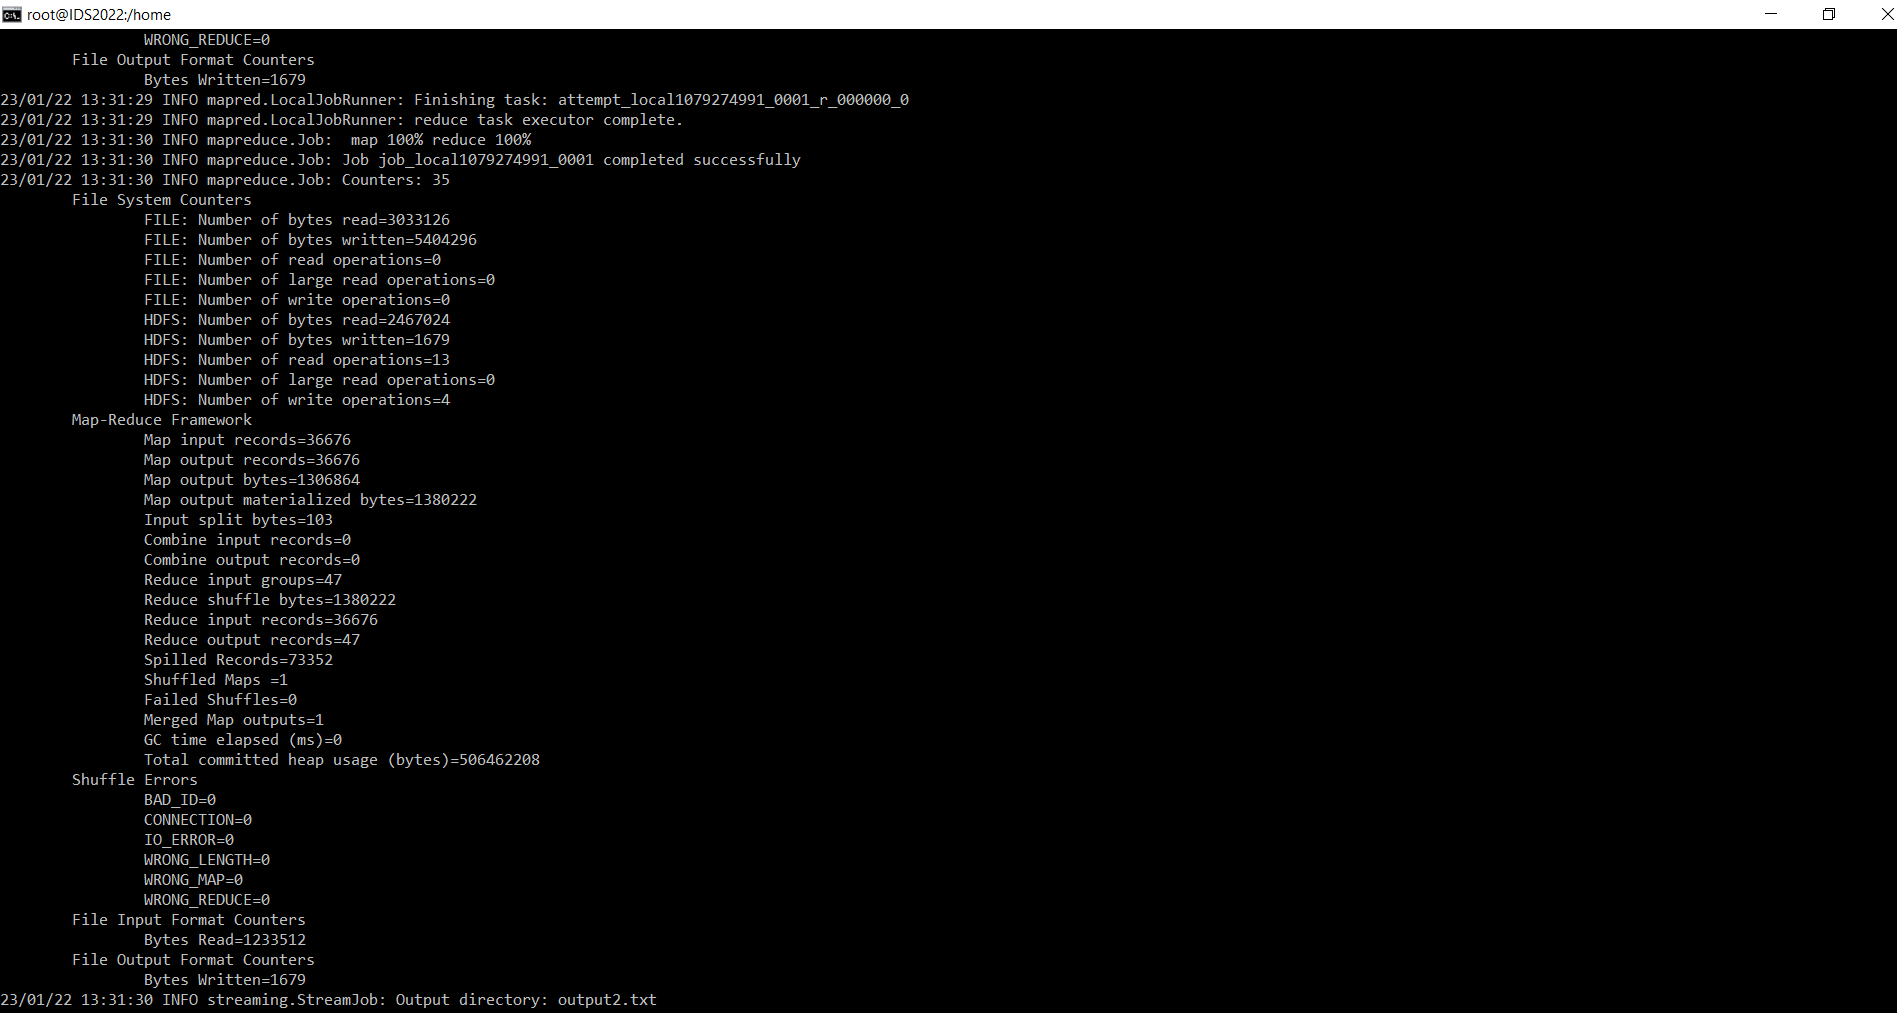

In [41]:
# your code
display(Image(filename='datasets/first_job_output_screenshot_of_a3.png'))
display(Image(filename='datasets/second_job_output_screenshot_of_a3.png'))

# Command for first MapReduce job: 
    # hadoop jar /usr/local/hadoop/share/hadoop/tools/lib/hadoop-streaming-2.10.1.jar -files nasa_mapper.py,nasa_reducer.py -mapper "python nasa_mapper.py" 
    #-reducer "python nasa_reducer.py" -input "input/448972-event-log/nasa-cev-software-tests-randomized-448972.tsv" -output "output.txt"

# Command for second MapReduce job:
    # hadoop jar /usr/local/hadoop/share/hadoop/tools/lib/hadoop-streaming-2.10.1.jar -files nasa_mapper2.py,nasa_reducer2.py -mapper "python nasa_mapper2.py" 
    #-reducer "python nasa_reducer2.py" -input "output.txt/part-00000" -output "output2.txt"

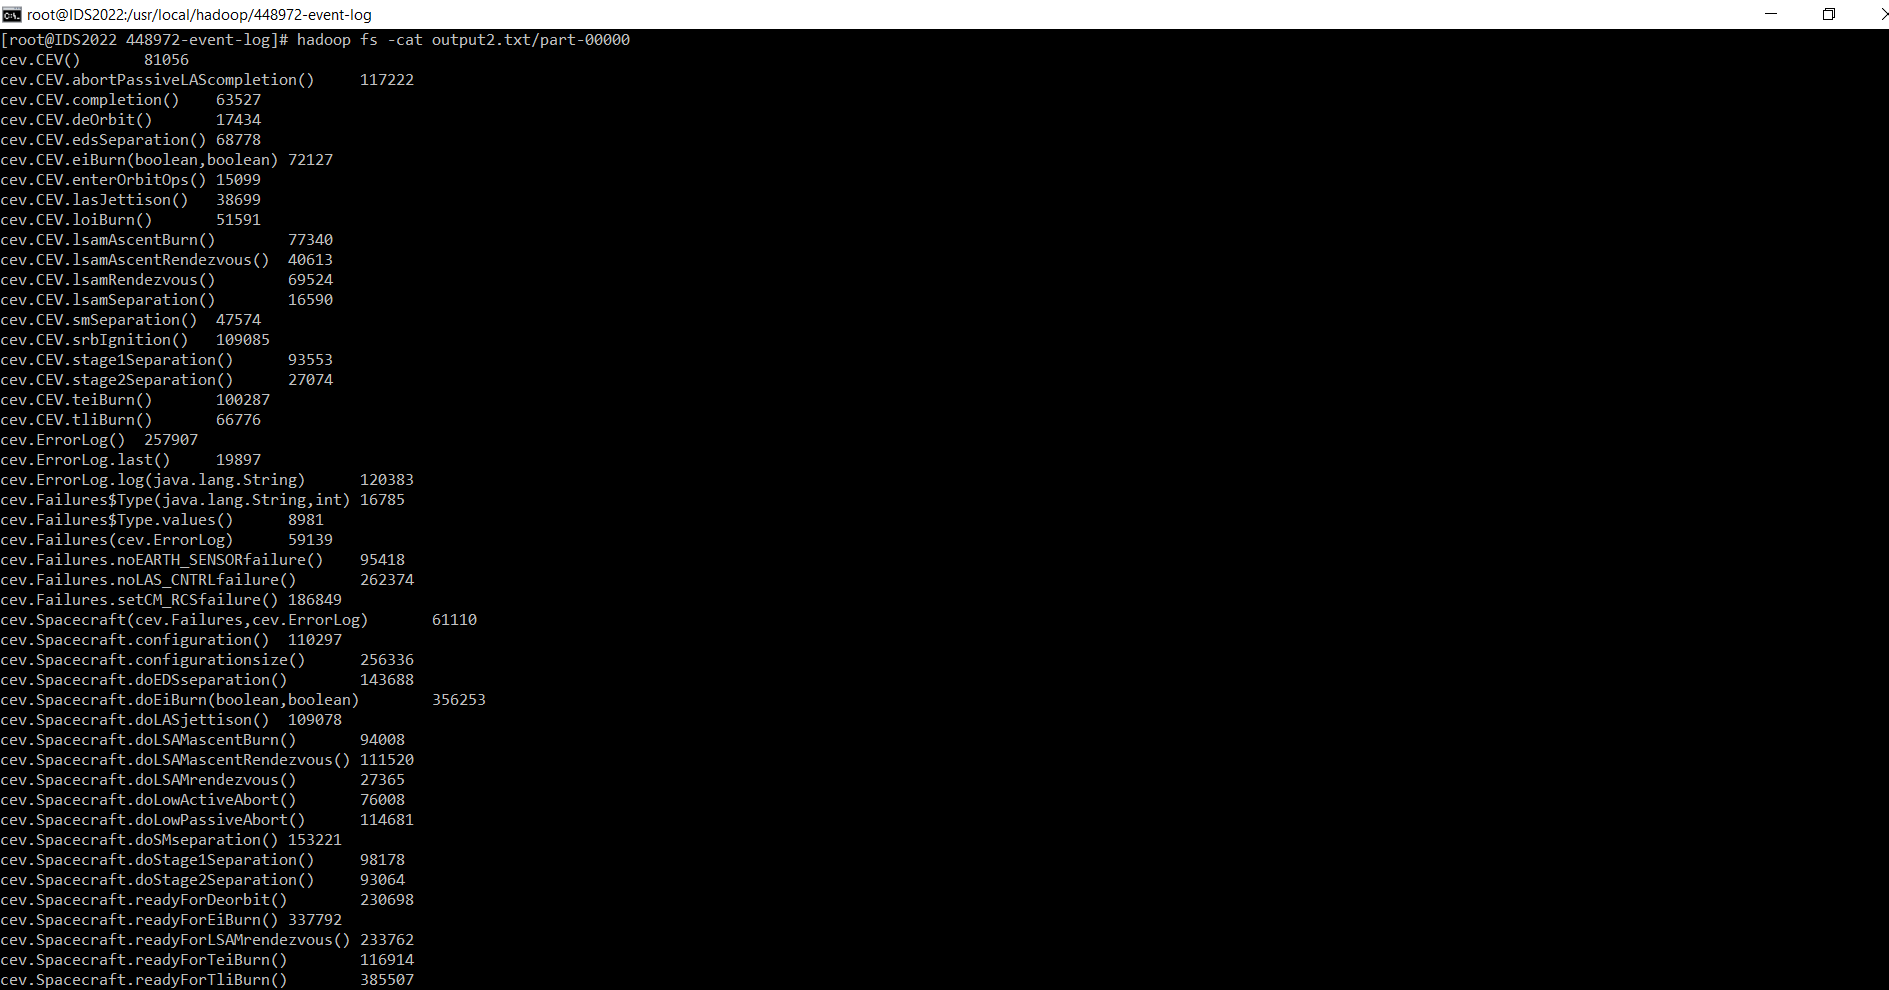

In [42]:
# your code
Image(filename='datasets/screenshot_of_a4.png')